[Table of Contents](./table_of_contents.ipynb)

# Probabilities, Gaussians, and Bayes' Theorem

In [4]:
%matplotlib inline

In [5]:
#format the book
import book_format
book_format.set_style()

## Introduction

The last chapter ended by discussing some of the drawbacks of the Discrete Bayesian filter. For many tracking and filtering problems our desire is to have a filter that is *unimodal* and *continuous*. That is, we want to model our system using floating point math (continuous) and to have only one belief represented (unimodal). For example, we want to say an aircraft is at (12.34, -95.54, 2389.5) where that is latitude, longitude, and altitude. We do not want our filter to tell us "it might be at (1.65, -78.01, 2100.45) or it might be at (34.36, -98.23, 2543.79)." That doesn't match our physical intuition of how the world works, and as we discussed, it can be prohibitively expensive to compute the multimodal case. And, of course, multiple position estimates makes navigating impossible.

We desire a unimodal, continuous way to represent probabilities that models how the real world works, and that is computationally efficient to calculate. Gaussian distributions provide all of these features.

## 简介

上一章以讨论离散贝叶斯过滤器的一些缺点作为结束。对于许多跟踪和过滤问题，我们希望有一个*单峰*和*连续*的过滤器。也就是说，我们希望使用浮点数学（连续）对我们的系统进行建模，并且只表示一个置信度（单峰）。例如，我们想说一架飞机位于 (12.34, -95.54, 2389.5)，即纬度、经度和高度。我们不希望我们的过滤器告诉我们“它可能在 (1.65, -78.01, 2100.45) 或者它可能在 (34.36, -98.23, 2543.79)”。这与我们对世界如何运作的物理直觉不符，而且正如我们所讨论的，计算多模态案例的成本可能高得令人望而却步。当然，多个位置估计使得导航变得不可能。

我们需要一种单峰的、连续的方式来表示概率，模拟现实世界的运作方式，并且计算效率高。高斯分布提供了所有这些特征。

## Mean, Variance, and Standard Deviations

Most of you will have had exposure to statistics, but allow me to cover this material anyway. I ask that you read the material even if you are sure you know it well. I ask for two reasons. First, I want to be sure that we are using terms in the same way. Second, I strive to form an intuitive understanding of statistics that will serve you well in later chapters. It's easy to go through a stats course and only remember the formulas and calculations, and perhaps be fuzzy on the implications of what you have learned.

你们中的大多数人都接触过统计数据，但无论如何请允许我介绍这些材料。我要求你阅读这些材料，即使你确定你很了解它。我问有两个原因。首先，我想确保我们以相同的方式使用术语。其次，我努力形成对统计的直观理解，这将在后面的章节中很好地为您服务。完成统计课程很容易只记住公式和计算，并且可能对所学内容的含义感到模糊。

### Random Variables

Each time you roll a die the *outcome* will be between 1 and 6. If we rolled a fair die a million times we'd expect to get a one 1/6 of the time. Thus we say the *probability*, or *odds* of the outcome 1 is 1/6. Likewise, if I asked you the chance of 1 being the result of the next roll you'd reply 1/6.  

This combination of values and associated probabilities is called a [*random variable*](https://en.wikipedia.org/wiki/Random_variable). Here *random* does not mean the process is nondeterministic, only that we lack information about the outcome. The result of a die toss is deterministic, but we lack enough information to compute the result. We don't know what will happen, except probabilistically.

While we are defining terms, the range of values is called the [*sample space*](https://en.wikipedia.org/wiki/Sample_space). For a die the sample space is {1, 2, 3, 4, 5, 6}. For a coin the sample space is {H, T}. *Space* is a mathematical term which means a set with structure. The sample space for the die is a subset of the natural numbers in the range of 1 to 6.

Another example of a random variable is the heights of students in a university. Here the sample space is a range of values in the real numbers between two limits defined by biology.

Random variables such as coin tosses and die rolls are *discrete random variables*. This means their sample space is represented by either a finite number of values or a countably infinite number of values such as the natural numbers. Heights of humans are called *continuous random variables* since they can take on any real value between two limits.

Do not confuse the *measurement* of the random variable with the actual value. If we can only measure the height of a person to 0.1 meters we would only record values from 0.1, 0.2, 0.3...2.7, yielding 27 discrete choices. Nonetheless a person's height can vary between any arbitrary real value between those ranges, and so height is a continuous random variable. 

In statistics capital letters are used for random variables, usually from the latter half of the alphabet. So, we might say that $X$ is the random variable representing the die toss, or $Y$ are the heights of the students in the freshmen poetry class. Later chapters use linear algebra to solve these problems, and so there we will follow the convention of using  lower case for vectors, and upper case for matrices. Unfortunately these conventions clash, and you will have to determine which an author is using from context. I always use bold symbols for vectors and matrices, which helps distinguish between the two.

每次掷骰子时，*结果* 将介于 1 和 6 之间。如果我们掷一百万次公平骰子，我们预计会得到 1/6 的机会。因此我们说结果 1 的*概率*或*赔率*是 1/6。同样，如果我问你下一次掷骰结果为 1 的概率，你会回答 1/6。这种值和相关概率的组合称为 [*随机变量*](https://en.wikipedia.org/wiki/Random_variable)。这里*随机*并不意味着过程是不确定的，只是我们缺乏关于结果的信息。掷骰子的结果是确定的，但我们缺乏足够的信息来计算结果。除了概率，我们不知道会发生什么。

当我们定义术语时，值的范围称为 [*样本空间*](https://en.wikipedia.org/wiki/Sample_space)。对于模具，样本空间为 {1, 2, 3, 4, 5, 6}。对于硬币，样本空间是 {H, T}。 *空间*是一个数学术语，表示具有结构的集合。骰子的样本空间是 1 到 6 范围内的自然数的子集。

随机变量的另一个例子是大学学生的身高。这里的样本空间是生物学定义的两个极限之间的实数值范围。

抛硬币和掷骰子等随机变量是*离散随机变量*。这意味着它们的样本空间由有限数量的值或可数无限数量的值（例如自然数）表示。人类的身高被称为*连续随机变量*，因为它们可以取两个极限之间的任何实际值。

不要将随机变量的*测量*与实际值混淆。如果我们只能将一个人的身高测量到 0.1 米，我们只会记录 0.1、0.2、0.3...2.7 的值，从而产生 27 个离散的选择。尽管如此，一个人的身高可以在这些范围内的任意实数值之间变化，因此身高是一个连续的随机变量。在统计学中，大写字母用于随机变量，通常来自字母表的后半部分。所以，我们可以说 $X$ 是代表掷骰子的随机变量，或者 $Y$ 是新生诗歌班学生的身高。后面的章节使用线性代数来解决这些问题，因此我们将遵循对向量使用小写字母，对矩阵使用大写字母的约定。不幸的是，这些约定发生冲突，您将不得不根据上下文确定作者使用的是哪一个。我总是对向量和矩阵使用粗体符号，这有助于区分两者。

## Probability Distribution


The [*probability distribution*](https://en.wikipedia.org/wiki/Probability_distribution) gives the probability for the random variable to take any value in a sample space. For example, for a fair six sided die we might say:

[*概率分布*](https://en.wikipedia.org/wiki/Probability_distribution) 给出了随机变量在样本空间中取任意值的概率。例如，对于一个公平的六面骰子，我们可能会说：


|Value|Probability|
|-----|-----------|
|1|1/6|
|2|1/6|
|3|1/6|
|4|1/6|
|5|1/6|
|6|1/6|

We denote this distribution with a lower case p: $p(x)$. Using ordinary function notation, we would write:

$$P(X{=}4) = p(4) = \frac{1}{6}$$

This states that the probability of the die landing on 4 is $\frac{1}{6}$. $P(X{=}x_k)$ is notation for "the probability of $X$ being $x_k$". Note the subtle notational difference. The capital $P$ denotes the probability of a single event, and the lower case $p$ is the probability distribution function. This can lead you astray if you are not observent. Some texts use $Pr$ instead of $P$ to ameliorate this. 

Another example is a fair coin. It has the sample space {H, T}. The coin is fair, so the probability for heads (H) is 50%, and the probability for tails (T) is 50%. We write this as

$$\begin{gathered}P(X{=}H) = 0.5\\P(X{=}T)=0.5\end{gathered}$$

Sample spaces are not unique. One sample space for a die is {1, 2, 3, 4, 5, 6}. Another valid sample space would be {even, odd}. Another might be {dots in all corners, not dots in all corners}. A sample space is valid so long as it covers all possibilities, and any single event is described by only one element.  {even, 1, 3, 4, 5} is not a valid sample space for a die since a value of 4 is matched both by 'even' and '4'.

The probabilities for all values of a *discrete random value* is known as the *discrete probability distribution* and the probabilities for all values of a *continuous random value* is known as the *continuous probability distribution*.

To be a probability distribution the probability of each value $x_i$ must be $x_i \ge 0$, since no probability can be less than zero. Secondly, the sum of the probabilities for all values must equal one. This should be intuitively clear for a coin toss: if the odds of getting heads is 70%, then the odds of getting tails must be 30%. We formulize this requirement as

$$\sum\limits_u P(X{=}u)= 1$$

for discrete distributions, and as 

$$\int\limits_u P(X{=}u) \,du= 1$$

for continuous distributions.

In the previous chapter we used probability distributions to estimate the position of a dog in a hallway. For example:


我们用小写的 p 表示这个分布：$p(x)$。使用普通的函数符号，我们会写：

$$P(X{=}4) = p(4) = \frac{1}{6}$$

这说明骰子落在 4 上的概率是 $\frac{1}{6}$。 $P(X{=}x_k)$ 是表示“$X$ 为 $x_k$ 的概率”的符号。请注意细微的符号差异。大写的$P$表示单个事件的概率，小写的$p$是概率分布函数。如果您不注意，这可能会使您误入歧途。一些文本使用 $Pr$ 而不是 $P$ 来改善这一点。

另一个例子是公平的硬币。它有样本空间{H, T}。硬币是公平的，因此正面 (H) 的概率为 50%，反面 (T) 的概率为 50%。我们把它写成

$$\begin{gathered}P(X{=}H) = 0.5\\P(X{=}T)=0.5\end{gathered}$$

样本空间不是唯一的。骰子的一个样本空间是 {1, 2, 3, 4, 5, 6}。另一个有效的样本空间是{even, odd}。另一个可能是{所有角落都有点，而不是所有角落都有点}。只要样本空间涵盖所有可能性，并且任何单个事件仅由一个元素描述，样本空间就是有效的。 {even, 1, 3, 4, 5} 不是骰子的有效样本空间，因为值 4 与“even”和“4”都匹配。

*离散随机值*的所有值的概率称为*离散概率分布*，*连续随机值*的所有值的概率称为*连续概率分布*。

要成为概率分布，每个值 $x_i$ 的概率必须为 $x_i \ge 0$，因为没有概率可以小于零。其次，所有值的概率之和必须等于 1。这对于抛硬币来说应该很直观：如果正面的几率是 70%，那么反面的几率一定是 30%。我们将此要求表述为

$$\sum\limits_u P(X{=}u)= 1$$

对于离散分布，以及

$$\int\limits_u P(X{=}u) \,du= 1$$

对于连续分布。

在上一章中，我们使用概率分布来估计狗在走廊中的位置。例如：

sum =  1.0


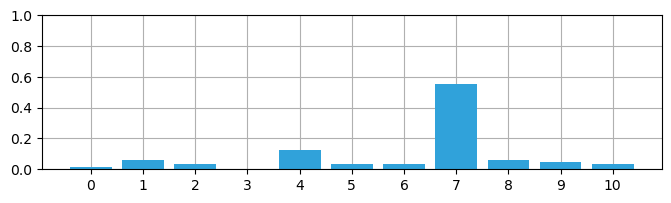

In [6]:
import numpy as np
import kf_book.book_plots as book_plots

belief = np.array([1, 4, 2, 0, 8, 2, 2, 35, 4, 3, 2])
belief = belief / np.sum(belief)
with book_plots.figsize(y=2):
    book_plots.bar_plot(belief)
print('sum = ', np.sum(belief))

Each position has a probability between 0 and 1, and the sum of all equals one, so this makes it a probability distribution. Each probability is discrete, so we can more precisely call this a discrete probability distribution. In practice we leave out the terms discrete and continuous unless we have a particular reason to make that distinction.

### The Mean, Median, and Mode of a Random Variable

Given a set of data we often want to know a representative or average value for that set. There are many measures for this, and the concept is called a [*measure of central tendency*](https://en.wikipedia.org/wiki/Central_tendency). For example we might want to know the *average* height of the students in a class. We all know how to find the average of a set of data, but let me belabor the point so I can introduce more formal notation and terminology. Another word for average is the *mean*. We compute the mean by summing the values and dividing by the number of values. If the heights of the students in meters is 

$$X = \{1.8, 2.0, 1.7, 1.9, 1.6\}$$

we compute the mean as

$$\mu = \frac{1.8 + 2.0 + 1.7 + 1.9 + 1.6}{5} = 1.8$$

It is traditional to use the symbol $\mu$ (mu) to denote the mean.

We can formalize this computation with the equation

$$ \mu = \frac{1}{n}\sum^n_{i=1} x_i$$

NumPy provides `numpy.mean()` for computing the mean.

### 随机变量的均值、中值和众数

给定一组数据，我们通常想知道该组的代表值或平均值。对此有很多衡量标准，这个概念称为[*集中趋势衡量标准*](https://en.wikipedia.org/wiki/Central_tendency)。例如，我们可能想知道班级中学生的*平均*身高。我们都知道如何找到一组数据的平均值，但让我详细说明这一点，以便介绍更正式的符号和术语。平均值的另一个词是*平均值*。我们通过对值求和并除以值的数量来计算平均值。如果以米为单位的学生身高是 $$X = \{1.8, 2.0, 1.7, 1.9, 1.6\}$$ 我们计算平均值为 $$\mu = \frac{1.8 + 2.0 + 1.7 + 1.9 + 1.6 }{5} = 1.8$$ 传统上使用符号 $\mu$ (mu) 来表示均值。

我们可以用等式 $$ \mu = \frac{1}{n}\sum^n_{i=1} x_i$$ 形式化这个计算 NumPy 提供了 `numpy.mean()` 来计算平均值。

In [7]:
x = [1.8, 2.0, 1.7, 1.9, 1.6]
np.mean(x)

1.8

As a convenience NumPy arrays provide the method `mean()`.

In [8]:
x = np.array([1.8, 2.0, 1.7, 1.9, 1.6])
x.mean()

1.8

The *mode* of a set of numbers is the number that occurs most often. If only one number occurs most often we say it is a *unimodal* set, and if two or more numbers occur the most with equal frequency than the set is *multimodal*. For example the set {1, 2, 2, 2, 3, 4, 4, 4} has modes 2 and 4, which is multimodal, and the set {5, 7, 7, 13} has the mode 7, and so it is unimodal. We will not be computing the mode in this manner in this book, but we do use the concepts of unimodal and multimodal in a more general sense. For example, in the **Discrete Bayes** chapter we talked about our belief in the dog's position as a *multimodal distribution* because we assigned different probabilities to different positions.

Finally, the *median* of a set of numbers is the middle point of the set so that half the values are below the median and half are above the median. Here, above and below is in relation to the set being sorted.  If the set contains an even number of values then the two middle numbers are averaged together.

Numpy provides `numpy.median()` to compute the median. As you can see the median of {1.8, 2.0, 1.7, 1.9, 1.6} is 1.8, because 1.8 is the third element of this set after being sorted. In this case the median equals the mean, but that is not generally true.

In [9]:
np.median(x)

1.8

## Expected Value of a Random Variable

The [*expected value*](https://en.wikipedia.org/wiki/Expected_value) of a random variable is the average value it would have if we took an infinite number of samples of it and then averaged those samples together. Let's say we have $x=[1,3,5]$ and each value is equally probable. What value would we *expect* $x$ to have, on average?

It would be the average of 1, 3, and 5, of course, which is 3. That should make sense; we would expect equal numbers of 1, 3, and 5 to occur, so $(1+3+5)/3=3$ is clearly the average of that infinite series of samples. In other words, here the expected value is the *mean* of the sample space.

Now suppose that each value has a different probability of happening. Say 1 has an 80% chance of occurring, 3 has an 15% chance, and 5 has only a 5% chance. In this case we compute the expected value by multiplying each value of $x$ by the percent chance of it occurring, and summing the result. For this case we could compute

$$\mathbb E[X] = (1)(0.8) + (3)(0.15) + (5)(0.05) = 1.5$$

Here I have introduced the notation $\mathbb E[X]$ for the expected value of $x$. Some texts use $E(x)$. The value 1.5 for $x$ makes intuitive sense because $x$ is far more likely to be 1 than 3 or 5, and 3 is more likely than 5 as well.

We can formalize this by letting $x_i$ be the $i^{th}$ value of $X$, and $p_i$ be the probability of its occurrence. This gives us

$$\mathbb E[X] = \sum_{i=1}^n p_ix_i$$

A trivial bit of algebra shows that if the probabilities are all equal, the expected value is the same as the mean:

$$\mathbb E[X] = \sum_{i=1}^n p_ix_i = \frac{1}{n}\sum_{i=1}^n x_i = \mu_x$$

If $x$ is continuous we substitute the sum for an integral, like so

$$\mathbb E[X] = \int_{a}^b\, xf(x) \,dx$$

where $f(x)$ is the probability distribution function of $x$. We won't be using this equation yet, but we will be using it in the next chapter.

We can write a bit of Python to simulate this. Here I take 1,000,000 samples and compute the expected value of the distribution we just computed analytically.

### 随机变量的期望值

随机变量的[*期望值*](https://en.wikipedia.org/wiki/Expected＿value)是如果我们取无限个样本，然后取这些样本的平均值，它将具有的平均值。假设我们有$x=[1,3,5]$每个值都是等概率的。平均而言，我们“期望”$x$的值是多少?它是1 3 5的平均值，当然是3。

这应该说得通;我们希望出现相等的1 3 5，所以$(1+3+5)/3=3$显然是无穷序列样本的平均值。换句话说，这里的期望值是样本空间的均值。

现在假设每个值都有不同的发生概率。假设1有80%的几率发生，3有15%的几率，5只有5%的几率。在这种情况下，我们通过将$x$的每个值乘以其发生的概率百分比，并对结果求和来计算期望值。在这种情况下，我们可以计算$$\mathbb E[X]=（1）（0.8）+（3）（0.15）+（5）（0.05）=1.5$$这里我介绍了$X$的预期值的符号$\mathbb E[X]。有些文本使用$E（x）$。$x$的值1.5很直观，因为$x$更可能是1而不是3或5，3也更可能是5。


我们可以将其形式化，让$x_i$为$X$的$i^{th}$值，$p_i$为其出现的概率。这给了我们$$\mathbb E[X] = \sum_{i=1}^n p_ix_i$$一个简单的代数表明，如果概率都相等，期望值与平均值相同:$$\mathbb E[X] = \sum_{i=1}^n p_ix_i = \frac{1}{n}\sum_{i=1}^n x_i = \mu_x$$如果$x$是连续的，我们将求和替换为积分，如$$\mathbb E[X] = \int_{a}^b\, xf(x) \,dx$$，其中$f(x)$是$x$的概率分布函数。我们现在不会用到这个方程，但下一章会用到。

我们可以写一点Python来模拟这个。这里我取1,000,000个样本，然后计算刚刚分析计算的分布的期望值。

In [10]:
total = 0
N = 1000000
for r in np.random.rand(N):
    if r <= .80: total += 1
    elif r < .95: total += 3
    else: total += 5

total / N

1.499908

You can see that the computed value is close to the analytically derived value. It is not exact because getting an exact values requires an infinite sample size.

### Exercise

What is the expected value of a die roll?

### Solution

Each side is equally likely, so each has a probability of 1/6. Hence
$$\begin{aligned}
\mathbb E[X] &= 1/6\times1 + 1/6\times 2 + 1/6\times 3 + 1/6\times 4 + 1/6\times 5 + 1/6\times6 \\
&= 1/6(1+2+3+4+5+6)\\&= 3.5\end{aligned}$$

### Exercise

Given the uniform continuous distribution

$$f(x) = \frac{1}{b - a}$$

compute the expected value for $a=0$ and $b=20$.

### Solution
$$\begin{aligned}
\mathbb E[X] &= \int_0^{20}\, x\frac{1}{20} \,dx \\
&= \bigg[\frac{x^2}{40}\bigg]_0^{20} \\
&= 10 - 0 \\
&= 10
\end{aligned}$$

### Variance of a Random Variable

The computation above tells us the average height of the students, but it doesn't tell us everything we might want to know. For example, suppose we have three classes of students, which we label $X$, $Y$, and $Z$, with these heights:

### 随机变量的方差

上述告诉告诉了我们学生的平均身高，但它并没有告诉我们我们可能想知道的一切。例如，假设我们有三类学生，我们将其标记为$X$、$Y$和$Z$，高度如下：


In [11]:
X = [1.8, 2.0, 1.7, 1.9, 1.6]
Y = [2.2, 1.5, 2.3, 1.7, 1.3]
Z = [1.8, 1.8, 1.8, 1.8, 1.8]

Using NumPy we see that the mean height of each class is the same. 

In [12]:
print(np.mean(X), np.mean(Y), np.mean(Z))

1.8 1.8 1.8


The mean of each class is 1.8 meters, but notice that there is a much greater amount of variation in the heights in the second class than in the first class, and that there is no variation at all in the third class.

The mean tells us something about the data, but not the whole story. We want to be able to specify how much *variation* there is between the heights of the students. You can imagine a number of reasons for this. Perhaps a school district needs to order 5,000 desks, and they want to be sure they buy sizes that accommodate the range of heights of the students. 

Statistics has formalized this concept of measuring variation into the notion of [*standard deviation*](https://en.wikipedia.org/wiki/Standard_deviation) and [*variance*](https://en.wikipedia.org/wiki/Variance). The equation for computing the variance is

$$\mathit{VAR}(X) = \mathbb  E[(X - \mu)^2]$$

Ignoring the square for a moment, you can see that the variance is the *expected value* for how much the sample space $X$ varies from the mean $\mu:$ ($X-\mu)$. I will explain the purpose of the squared term later. The formula for the expected value is $\mathbb E[X] = \sum\limits_{i=1}^n p_ix_i$ so we can substitute that into the equation above to get

$$\mathit{VAR}(X) = \frac{1}{n}\sum_{i=1}^n (x_i - \mu)^2$$
 
Let's compute the variance of the three classes to see what values we get and to become familiar with this concept.

The mean of $X$ is 1.8 ($\mu_x = 1.8$) so we compute

$$ 
\begin{aligned}
\mathit{VAR}(X) &=\frac{(1.8-1.8)^2 + (2-1.8)^2 + (1.7-1.8)^2 + (1.9-1.8)^2 + (1.6-1.8)^2} {5} \\
&= \frac{0 + 0.04 + 0.01 + 0.01 + 0.04}{5} \\
\mathit{VAR}(X)&= 0.02 \, m^2
\end{aligned}$$

NumPy provides the function `var()` to compute the variance:

每个班级的平均值为 1.8 米，但请注意，第二班级的身高变化量比第一班级大得多，而第三班级则完全没有变化。

均值告诉我们一些关于数据的信息，但不是全部。我们希望能够指定学生身高之间的*差异*。你可以想象出很多原因。也许一个学区需要订购 5,000 张课桌，他们希望确保购买的课桌尺寸适合学生的身高范围。统计学已经将这种测量变异的概念形式化为 [*标准差*](https://en.wikipedia.org/wiki/Standard_deviation) 和 [*方差*](https://en.wikipedia.org/维基/方差)。计算方差的方程是 $$\mathit{VAR}(X) = \mathbb E[(X - \mu)^2]$$ 暂时忽略平方，可以看到方差是*预期的值*表示样本空间 $X$ 与平均值 $\mu:$ ($X-\mu)$ 的差异。稍后我将解释平方项的用途。期望值的公式是 $\mathbb E[X] = \sum\limits_{i=1}^n p_ix_i$ 所以我们可以将其代入上面的等式得到 $$\mathit{VAR}(X) = \frac{1}{n}\sum_{i=1}^n (x_i - \mu)^2$$ 让我们计算三个类别的方差，看看我们得到什么值，并熟悉这个概念。

$X$ 的平均值是 1.8 ($\mu_x = 1.8$) 所以我们计算 $$ \begin{aligned} \mathit{VAR}(X) &=\frac{(1.8-1.8)^2 + (2- 1.8)^2 + (1.7-1.8)^2 + (1.9-1.8)^2 + (1.6-1.8)^2} {5} \\ &= \frac{0 + 0.04 + 0.01 + 0.01 + 0.04}{ 5} \\ \mathit{VAR}(X)&= 0.02 \, m^2 \end{aligned}$$ NumPy 提供函数 `var()` 来计算方差：

In [13]:
print(f"{np.var(X):.2f} meters squared")

0.02 meters squared


This is perhaps a bit hard to interpret. Heights are in meters, yet the variance is meters squared. Thus we have a more commonly used measure, the *standard deviation*, which is defined as the square root of the variance:

$$\sigma = \sqrt{\mathit{VAR}(X)}=\sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

It is typical to use $\sigma$ for the *standard deviation* and $\sigma^2$ for the *variance*. In most of this book I will be using $\sigma^2$ instead of $\mathit{VAR}(X)$ for the variance; they symbolize the same thing.

For the first class we compute the standard deviation with

$$ 
\begin{aligned}
\sigma_x &=\sqrt{\frac{(1.8-1.8)^2 + (2-1.8)^2 + (1.7-1.8)^2 + (1.9-1.8)^2 + (1.6-1.8)^2} {5}} \\
&= \sqrt{\frac{0 + 0.04 + 0.01 + 0.01 + 0.04}{5}} \\
\sigma_x&= 0.1414
\end{aligned}$$

We can verify this computation with the NumPy method `numpy.std()` which computes the standard deviation. 'std' is a common abbreviation for standard deviation.

这可能有点难以解释。高度以米为单位，但方差是平方米。因此我们有一个更常用的度量，*标准差*，它被定义为方差的平方根：$$\sigma = \sqrt{\mathit{VAR}(X)}=\sqrt{\frac{ 1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$ 通常使用 $\sigma$ 作为*标准差*，使用 $\sigma^2$ 作为 *方差*。在本书的大部分内容中，我将使用 $\sigma^2$ 而不是 $\mathit{VAR}(X)$ 作为方差；他们象征着同一件事。
对于第一类，我们用 $$ \begin{aligned} \sigma_x &=\sqrt{\frac{(1.8-1.8)^2 + (2-1.8)^2 + (1.7-1.8)^2 计算标准差+ (1.9-1.8)^2 + (1.6-1.8)^2} {5}} \\ &= \sqrt{\frac{0 + 0.04 + 0.01 + 0.01 + 0.04}{5}} \\ \sigma_x&= 0.1414 \end{aligned}$$ 我们可以使用计算标准差的 NumPy 方法 `numpy.std()` 来验证这个计算。 “std”是标准偏差的常见缩写。

In [14]:
print(f"std {np.std(X):.4f}")
print(f"var {np.std(X)**2:.4f}")

std 0.1414
var 0.0200


And, of course, $0.1414^2 = 0.02$, which agrees with our earlier computation of the variance.

What does the standard deviation signify? It tells us how much the heights vary amongst themselves. "How much" is not a mathematical term. We will be able to define it much more precisely once we introduce the concept of a Gaussian in the next section. For now I'll say that for many things 68% of all values lie within one standard deviation of the mean. In other words we can conclude that for a random class 68% of the students will have heights between 1.66 (1.8-0.1414) meters and 1.94 (1.8+0.1414) meters. 

We can view this in a plot:

当然，$0.1414^2 = 0.02$，这与我们之前的方差计算一致。

标准偏差意味着什么？它告诉我们高度之间的差异有多大。 “多少”不是一个数学术语。一旦我们在下一节中介绍了高斯的概念，我们将能够更准确地定义它。现在我要说的是，对于很多事情，所有值的 68% 都在均值的一个标准差范围内。换句话说，我们可以得出结论，对于一个随机班级，68% 的学生身高介于 1.66 (1.8-0.1414) 米和 1.94 (1.8+0.1414) 米之间。我们可以在图中查看：

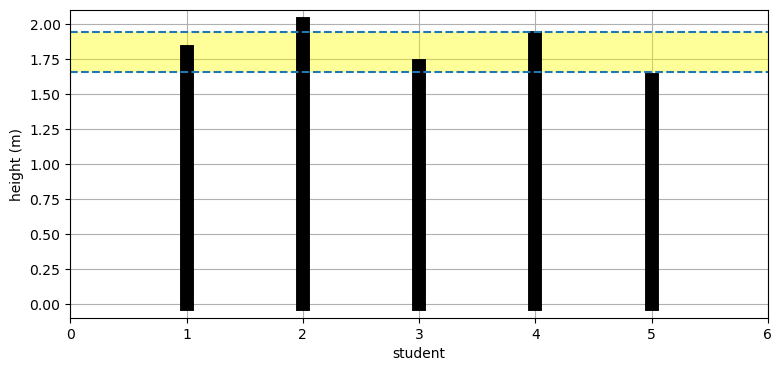

In [15]:
from kf_book.gaussian_internal import plot_height_std
import matplotlib.pyplot as plt

plot_height_std(X)

For only 5 students we obviously will not get exactly 68% within one standard deviation. We do see that 3 out of 5 students are within $\pm1\sigma$, or 60%, which is as close as you can get to 68% with only 5 samples. Let's look at the results for a class with 100 students.

>  We write one standard deviation as  $1\sigma$, which is pronounced "one standard deviation", not "one sigma". Two standard deviations is $2\sigma$, and so on.

对于只有 5 个学生，我们显然不会在一个标准差内得到准确的 68%。我们确实看到 5 名学生中有 3 名在 $\pm1\sigma$ 内，即 60%，这与仅使用 5 个样本即可达到的 68% 非常接近。让我们看一下有 100 名学生的班级的结果。

> 我们把一个标准差写成$1\sigma$，读作“one standard deviation”，而不是“one sigma”。两个标准差是 $2\sigma$，依此类推。

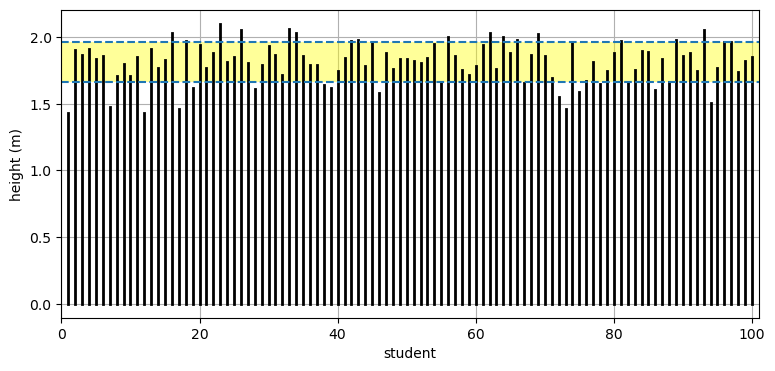

mean = 1.810
std  = 0.150


In [16]:
from numpy.random import randn
data = 1.8 + randn(100)*.1414
mean, std = data.mean(), data.std()

plot_height_std(data, lw=2)
print(f'mean = {mean:.3f}')
print(f'std  = {std:.3f}')

By eye roughly 68% of the heights lie within $\pm1\sigma$ of the mean 1.8, but we can verify this with code.

In [17]:
np.sum((data > mean-std) & (data < mean+std)) / len(data) * 100.

64.0

We'll discuss this in greater depth soon. For now let's compute the standard deviation for 

$$Y = [2.2, 1.5, 2.3, 1.7, 1.3]$$

The mean of $Y$ is $\mu=1.8$ m, so 

$$ 
\begin{aligned}
\sigma_y &=\sqrt{\frac{(2.2-1.8)^2 + (1.5-1.8)^2 + (2.3-1.8)^2 + (1.7-1.8)^2 + (1.3-1.8)^2} {5}} \\
&= \sqrt{0.152} = 0.39 \ m
\end{aligned}$$

We will verify that with NumPy with

我们很快就会更深入地讨论这个问题。现在让我们计算 $$Y = [2.2, 1.5, 2.3, 1.7, 1.3]$$ 的标准差

 $Y$ 的平均值是 $\mu=1.8$ m，所以 $$ \begin{aligned} \sigma_y &=\sqrt{\frac{(2.2-1.8)^2 + (1.5-1.8)^2 + (2.3-1.8)^2 + (1.7-1.8)^2 + (1.3-1.8)^2} {5 }} \\ &= \sqrt{0.152} = 0.39 \ m \end{aligned}$$ 
 
 我们将用 NumPy 验证

In [18]:
print(f'std of Y is {np.std(Y):.2f} m')

std of Y is 0.39 m


This corresponds with what we would expect. There is more variation in the heights for $Y$, and the standard deviation is larger.

Finally, let's compute the standard deviation for $Z$. There is no variation in the values, so we would expect the standard deviation to be zero.

这符合我们的预期。 $Y$ 的高度变化更大，标准差更大。

最后，让我们计算 $Z$ 的标准差。值没有变化，因此我们预计标准偏差为零。

$$ 
\begin{aligned}
\sigma_z &=\sqrt{\frac{(1.8-1.8)^2 + (1.8-1.8)^2 + (1.8-1.8)^2 + (1.8-1.8)^2 + (1.8-1.8)^2} {5}} \\
&= \sqrt{\frac{0+0+0+0+0}{5}} \\
\sigma_z&= 0.0 \ m
\end{aligned}$$



In [19]:
print(np.std(Z))

0.0


Before we continue I need to point out that I'm ignoring that on average  men are taller than women. In general the height variance of a class that contains only men or women will be smaller than a class with both sexes. This is true for other factors as well. Well nourished children are taller than malnourished children. Scandinavians are taller than Italians. When designing experiments statisticians need to take these factors into account. 

I suggested we might be performing this analysis to order desks for a school district.  For each age group there are likely to be two different means - one clustered around the mean height of the females, and a second mean clustered around the mean heights of the males. The mean of the entire class will be somewhere between the two. If we bought desks for the mean of all students we are likely to end up with desks that fit neither the males or females in the school! 

We will not to consider these issues in this book.  Consult any standard probability text if you need to learn techniques to deal with these issues.

在我们继续之前，我需要指出我忽略了男性平均比女性高的事实。一般来说，只包含男性或女性的类的身高方差将小于包含两种性别的类。对于其他因素也是如此。营养良好的儿童比营养不良的儿童更高。斯堪的纳维亚人比意大利人高。在设计实验时，统计学家需要考虑这些因素。

我建议我们可以执行此分析来为学区订购课桌。对于每个年龄组，可能有两种不同的平均值 - 一种围绕女性的平均身高聚集，第二个平均值围绕男性的平均身高聚集。整个班级的平均值将介于两者之间。如果我们为所有学生的平均水平购买课桌，我们最终可能会得到既不适合学校男生也不适合女生的课桌！

我们不会在本书中考虑这些问题。如果您需要学习处理这些问题的技术，请查阅任何标准概率文本。

### Why the Square of the Differences

Why are we taking the *square* of the differences for the variance? I could go into a lot of math, but let's look at this in a simple way. Here is a chart of the values of $X$ plotted against the mean for $X=[3,-3,3,-3]$

为什么我们要用差异的*平方*作为方差？我可以涉及很多数学，但让我们以简单的方式来看一下。这是 $X$ 的值相对于 $X=[3,-3,3,-3]$ 的平均值绘制的图表

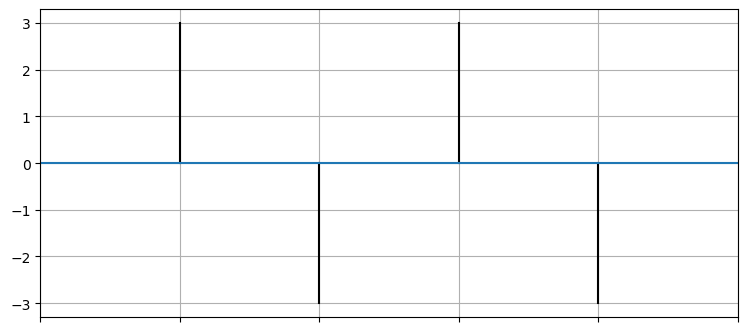

In [20]:
X = [3, -3, 3, -3]
mean = np.average(X)
for i in range(len(X)):
    plt.plot([i ,i], [mean, X[i]], color='k')
plt.axhline(mean)
plt.xlim(-1, len(X))
plt.tick_params(axis='x', labelbottom=False)

If we didn't take the square of the differences the signs would cancel everything out:

$$\frac{(3-0) + (-3-0) + (3-0) + (-3-0)}{4} = 0$$

This is clearly incorrect, as there is more than 0 variance in the data. 

Maybe we can use the absolute value? We can see by inspection that the result is $12/4=3$ which is certainly correct — each value varies by 3 from the mean. But what if we have $Y=[6, -2, -3, 1]$? In this case we get $12/4=3$. $Y$ is clearly more spread out than $X$, but the computation yields the same variance. If we use the formula using squares we get a variance of 3.5 for $Y$, which reflects its larger variation.

This is not a proof of correctness. Indeed, Carl Friedrich Gauss, the inventor of the technique, recognized that it is somewhat arbitrary. If there are outliers then squaring the difference gives disproportionate weight to that term. For example, let's see what happens if we have:

如果我们不求差的平方，符号会抵消所有内容：$$\frac{(3-0) + (-3-0) + (3-0) + (-3-0)}{ 4} = 0$$ 

这显然是不正确的，因为数据中的方差大于 0。也许我们可以使用绝对值？我们可以通过检查看到结果是 $12/4=3$，这当然是正确的——每个值都与平均值相差 3。但是如果我们有 $Y=[6, -2, -3, 1]$ 呢？在这种情况下，我们得到 $12/4=3$。 $Y$ 显然比 $X$ 分散得更多，但计算得出相同的方差。

如果我们使用带正方形的公式，我们得到 $Y$ 的方差为 3.5，这反映了它较大的变化。

这不是正确性的证明。事实上，该技术的发明者卡尔·弗里德里希·高斯 (Carl Friedrich Gauss) 认识到它有些武断。如果存在异常值，则对差异进行平方会给该术语带来不成比例的权重。例如，让我们看看如果我们有会发生什么：

In [21]:
X = [1, -1, 1, -2, -1, 2, 1, 2, -1, 1, -1, 2, 1, -2, 100]
print(f'Variance of X with outlier    = {np.var(X):6.2f}')
print(f'Variance of X without outlier = {np.var(X[:-1]):6.2f}')

Variance of X with outlier    = 621.45
Variance of X without outlier =   2.03


Is this "correct"? You tell me. Without the outlier of 100 we get $\sigma^2=2.03$, which accurately reflects how $X$ is varying absent the outlier. The one outlier swamps the variance computation. Do we want to swamp the computation so we know there is an outlier, or robustly incorporate the outlier and still provide an estimate close to the value absent the outlier? Again, you tell me. Obviously it depends on your problem.

I will not continue down this path; if you are interested you might want to look at the work that James Berger has done on this problem, in a field called *Bayesian robustness*, or the excellent publications on *robust statistics* by Peter J. Huber [4]. In this book we will always use variance and standard deviation as defined by Gauss.

The point to gather from this is that these *summary* statistics always tell an incomplete story about our data. In this example variance as defined by Gauss does not tell us we have a single large outlier. However, it is a powerful tool, as we can concisely describe a large data set with a few numbers. If we had 1 billion data points we would not want to inspect plots by eye or look at lists of numbers; summary statistics give us a way to describe the shape of the data in a useful way.

它是否正确？你告诉我。没有异常值 100，我们得到 $\sigma^2=2.03$，它准确地反映了 $X$ 在没有异常值的情况下是如何变化的。一个异常值淹没了方差计算。我们是想淹没计算以便我们知道存在异常值，还是稳健地合并异常值并仍然提供接近没有异常值的值的估计值？再说一遍，你告诉我。显然这取决于你的问题。

我不会继续走这条路；如果您有兴趣，您可能想看看 James Berger 在这个问题上所做的工作，在一个名为 *Bayesian robustness* 的领域，或者 Peter J. Huber [4] 关于 *robust statistics* 的优秀出版物。在本书中，我们将始终使用高斯定义的方差和标准差。

从这里收集的要点是，这些*摘要*统计数据总是讲述我们数据的不完整故事。在这个例子中，高斯定义的方差并没有告诉我们有一个大的离群值。然而，它是一个强大的工具，因为我们可以用几个数字简洁地描述一个大数据集。如果我们有 10 亿个数据点，我们就不想用眼睛检查图表或查看数字列表；摘要统计为我们提供了一种以有用的方式描述数据形状的方法。

## Gaussians

We are now ready to learn about [Gaussians](https://en.wikipedia.org/wiki/Gaussian_function). Let's remind ourselves of the motivation for this chapter.

> We desire a unimodal, continuous way to represent probabilities that models how the real world works, and that is computationally efficient to calculate.

Let's look at a graph of a Gaussian distribution to get a sense of what we are talking about.

## 高斯

人我们现在准备学习[高斯](https://en.Wikipedia.org/wiki/Gaussian_function)。让我们提醒自己这一章的动机。

>我们希望有一种单峰、连续的方式来表示模拟真实世界如何工作的概率，并且计算效率很高。

让我们看一个高斯分布图来了解我们正在谈论的内容。

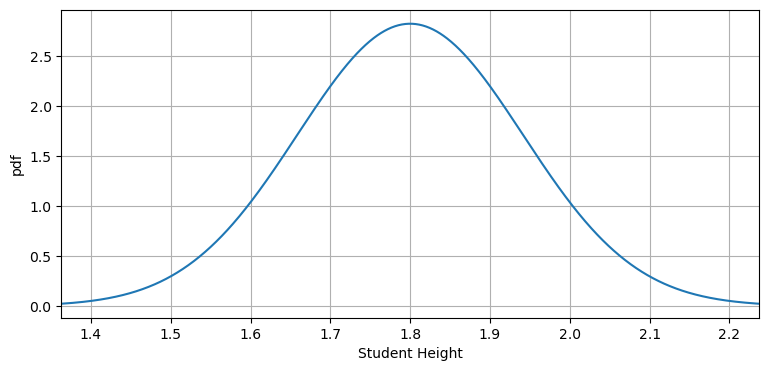

In [22]:
from filterpy.stats import plot_gaussian_pdf
plot_gaussian_pdf(mean=1.8, variance=0.1414**2, 
                  xlabel='Student Height', ylabel='pdf');

This curve is a [*probability density function*](https://en.wikipedia.org/wiki/Probability_density_function) or *pdf* for short. It shows the relative likelihood  for the random variable to take on a value. We can tell from the chart student is somewhat more likely to have a height near 1.8 m than 1.7 m, and far more likely to have a height of 1.9 m vs 1.4 m. Put another way, many students will have a height near 1.8 m, and very few students will have a height of 1.4 m or 2.2 meters. Finally, notice that the curve is centered over the mean of 1.8 m.

> I explain how to plot Gaussians, and much more, in the Notebook *Computing_and_Plotting_PDFs* in the 
Supporting_Notebooks folder. You can read it online [here](https://github.com/rlabbe/Kalman-and-Bayesian-Filters-in-Python/blob/master/Supporting_Notebooks/Computing_and_plotting_PDFs.ipynb) [1].

This may be recognizable to you as a 'bell curve'. This curve is ubiquitous because under real world conditions many observations are distributed in such a manner. I will not use the term 'bell curve' to refer to a Gaussian because many probability distributions have a similar bell curve shape. Non-mathematical sources might not be as precise, so be judicious in what you conclude when you see the term used without definition.

This curve is not unique to heights — a vast amount of natural phenomena exhibits this sort of distribution, including the sensors that we use in filtering problems. As we will see, it also has all the attributes that we are looking for — it represents a unimodal belief or value as a probability, it is continuous, and it is computationally efficient. We will soon discover that it also has other desirable qualities which we may not realize we desire.

To further motivate you, recall the shapes of the probability distributions in the *Discrete Bayes* chapter:


此曲线是 [*概率密度函数*](https://en.wikipedia.org/wiki/Probability_density_function) 或简称 *pdf*。它显示了随机变量取值的相对可能性。从图表中我们可以看出，学生身高接近 1.8 m 的可能性比接近 1.7 m 的可能性更大，身高接近 1.9 m 和 1.4 m 的可能性更大。换句话说，很多学生的身高会在1.8米左右，很少有学生会达到1.4米或2.2米。最后，请注意曲线以 1.8 m 的平均值为中心。

> 我在 Supporting_Notebooks 文件夹中的 Notebook *Computing_and_Plotting_PDFs* 中解释了如何绘制高斯分布等等。您可以 [此处](https://github.com/rlabbe/Kalman-and-Bayesian-Filters-in-Python/blob/master/Supporting_Notebooks/Computing_and_plotting_PDFs.ipynb) [1] 在线阅读。
>
您可能会将其识别为“钟形曲线”。这条曲线无处不在，因为在现实世界条件下，许多观测值都是以这种方式分布的。我不会使用术语“钟形曲线”来指代高斯分布，因为许多概率分布都具有相似的钟形曲线形状。非数学来源可能不那么精确，因此当您看到使用的术语没有定义时，请谨慎判断您的结论。

这条曲线并不是高度所独有的——大量的自然现象都表现出这种分布，包括我们在过滤问题中使用的传感器。正如我们将看到的，它还具有我们正在寻找的所有属性——它代表一个单峰置信度或概率值，它是连续的，并且计算效率高。我们很快就会发现它还有其他我们可能没有意识到的令人向往的品质。

为了进一步启发你，回忆一下*离散贝叶斯*章节中概率分布的形状：

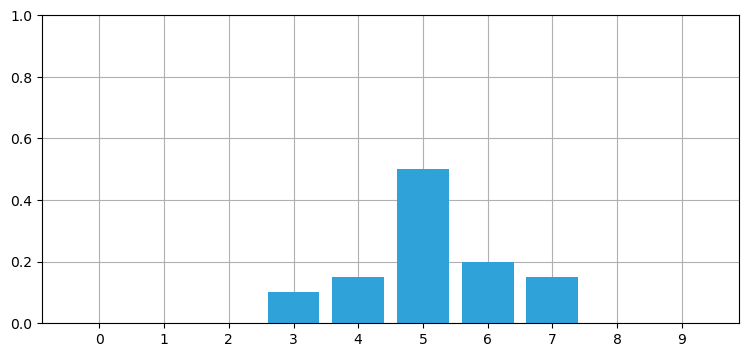

In [23]:
import kf_book.book_plots as book_plots
belief = [0., 0., 0., 0.1, 0.15, 0.5, 0.2, .15, 0, 0]
book_plots.bar_plot(belief)

They were not perfect Gaussian curves, but they were similar. We will be using Gaussians to replace the discrete probabilities used in that chapter!

它们不是完美的高斯曲线，但它们很相似。我们将使用高斯来代替该章中使用的离散概率！

## Nomenclature

A bit of nomenclature before we continue - this chart depicts the *probability density* of a *random variable* having any value between ($-\infty..\infty)$. What does that mean? Imagine we take an infinite number of infinitely precise measurements of the speed of automobiles on a section of highway. We could then plot the results by showing the relative number of cars going past at any given speed. If the average was 120 kph, it might look like this:

## 术语

在我们继续之前先了解一下术语——这张图表描绘了一个*随机变量*的*概率密度*，其值介于($-\infty..\infty)$ 之间。这意味着什么？想象一下，我们对一段高速公路上的汽车速度进行了无数次无限精确的测量。然后我们可以通过显示以任何给定速度经过的汽车的相对数量来绘制结果。如果平均值是 120 公里/小时，它可能看起来像这样：

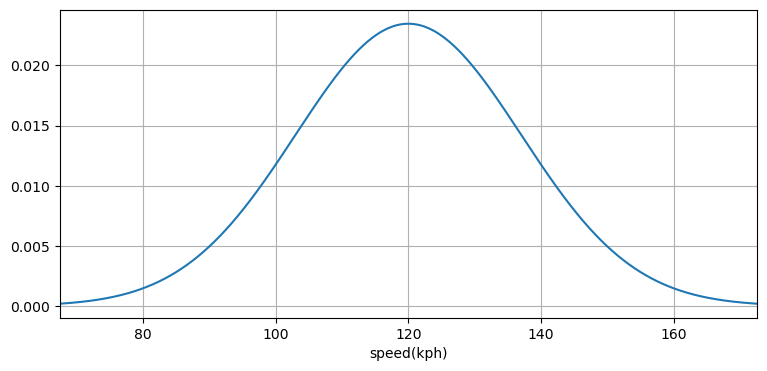

In [24]:
plot_gaussian_pdf(mean=120, variance=17**2, xlabel='speed(kph)');

The y-axis depicts the *probability density* — the relative amount of cars that are going the speed at the corresponding x-axis. I will explain this further in the next section.

The Gaussian model is imperfect. Though these charts do not show it, the *tails* of the distribution extend out to infinity. *Tails* are the far ends of the curve where the values are the lowest. Of course human heights or automobile speeds cannot be less than zero, let alone $-\infty$ or $\infty$. “The map is not the territory” is a common expression, and it is true for Bayesian filtering and statistics. The Gaussian distribution above models the distribution of the measured automobile speeds, but being a model it is necessarily imperfect. The difference between model and reality will come up again and again in these filters. Gaussians are used in many branches of mathematics, not because they perfectly model reality, but because they are easier to use than any other relatively accurate choice. However, even in this book Gaussians will fail to model reality, forcing us to use computationally expensive alternatives. 

You will hear these distributions called *Gaussian distributions* or *normal distributions*.  *Gaussian* and *normal* both mean the same thing in this context, and are used interchangeably. I will use both throughout this book as different sources will use either term, and I want you to be used to seeing both. Finally, as in this paragraph, it is typical to shorten the name and talk about a *Gaussian* or *normal* — these are both typical shortcut names for the *Gaussian distribution*. 

y 轴表示*概率密度*——以相应 x 轴速度行驶的汽车的相对数量。我将在下一节中进一步解释这一点。

高斯模型是不完美的。虽然这些图表没有显示，但分布的*尾部*延伸到无穷大。 *尾部* 是曲线的远端，其中值最低。当然，人的身高或汽车速度不能小于零，更不用说 $-\infty$ 或 $\infty$ 了。 “地图不是领土”是一个常见的表达方式，对于贝叶斯过滤和统计来说也是如此。上面的高斯分布模拟了测得的汽车速度的分布，但作为一个模型，它必然是不完美的。模型和现实之间的差异将在这些过滤器中一次又一次地出现。高斯分布在许多数学分支中使用，不是因为它们完美地模拟了现实，而是因为它们比任何其他相对准确的选择都更容易使用。然而，即使在这本书中，高斯也无法模拟现实，迫使我们使用计算成本高昂的替代方案。

您会听到这些分布称为*高斯分布*或*正态分布*。 *Gaussian* 和 *normal* 在此上下文中表示同一事物，并且可以互换使用。我将在整本书中使用这两个术语，因为不同的来源会使用其中一个术语，我希望你习惯于看到这两个术语。最后，在本段中，通常会缩短名称并谈论 *Gaussian* 或 *normal* — 这些都是 *Gaussian distribution* 的典型缩写名称。

## Gaussian Distributions

Let's explore how Gaussians work. A Gaussian is a *continuous probability distribution* that is completely described with two parameters, the mean ($\mu$) and the variance ($\sigma^2$). It is defined as:

$$ 
f(x, \mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi}} \exp\big [{-\frac{(x-\mu)^2}{2\sigma^2} }\big ]
$$

$\exp[x]$ is notation for $e^x$.

<p> Don't be dissuaded by the equation if you haven't seen it before; you will not need to memorize or manipulate it. The computation of this function is stored in `stats.py` with the function `gaussian(x, mean, var, normed=True)`. 
    
Shorn of the constants, you can see it is a simple exponential:
    
$$f(x)\propto e^{-x^2}$$

which has the familiar bell curve shape


## 高斯分布

让我们探讨一下高斯分布是如何工作的。高斯分布是一个*连续概率分布*，完全用两个参数来描述，均值 ($\mu$) 和方差 ($\sigma^2$)。它被定义为： $$ f(x, \mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi}} \exp\big [{-\frac{(x-\mu) ^2}{2\sigma^2} }\big ] $$ $\exp[x]$ 是 $e^x$ 的符号。

<p> 如果您以前没有见过方程式，请不要被它吓倒；你不需要记住或操纵它。该函数的计算结果存储在带有函数 gaussian(x, mean, var, normed=True) 的 stats.py 中。

去掉常数，您可以看到它是一个简单的指数函数：$$f(x)\propto e^{-x^2}$$ 具有熟悉的钟形曲线形状

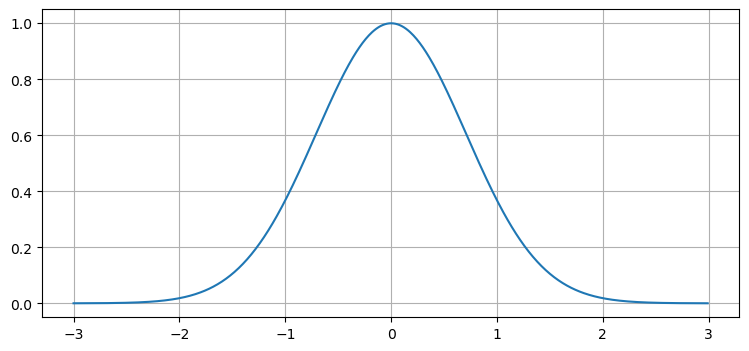

In [25]:
x = np.arange(-3, 3, .01)
plt.plot(x, np.exp(-x**2));

Let's remind ourselves how to look at the code for a function. In a cell, type the function name followed by two question marks and press CTRL+ENTER. This will open a popup window displaying the source. Uncomment the next cell and try it now.

让我们提醒自己如何查看函数的代码。在单元格中，键入函数名称，后跟两个问号，然后按 CTRL+ENTER。这将打开一个显示源的弹出窗口。取消注释下一个单元格并立即尝试。

In [26]:
from filterpy.stats import gaussian
gaussian??

Signature: gaussian(x, mean, var, normed=True)
Source:   
def gaussian(x, mean, var, normed=True):
    """
    returns normal distribution (pdf) for x given a Gaussian with the
    specified mean and variance. All must be scalars.

    gaussian (1,2,3) is equivalent to scipy.stats.norm(2,math.sqrt(3)).pdf(1)
    It is quite a bit faster albeit much less flexible than the latter.

    Parameters
    ----------

    x : scalar or array-like
        The value for which we compute the probability

    mean : scalar
        Mean of the Gaussian

    var : scalar
        Variance of the Gaussian

    norm : bool, default True
        Normalize the output if the input is an array of values.

    Returns
    -------

    probability : float
        probability of x for the Gaussian (mean, var). E.g. 0.101 denotes
        10.1%.

    Examples
    --------

    >>> gaussian(8, 1, 2)
    1.3498566943461957e-06

    >>> gaussian([8, 7, 9], 1, 2)
    array([1.34985669e-06, 3.48132630e-05, 3.1745586

Let's plot a Gaussian with a mean of 22 $(\mu=22)$, with a variance of 4 $(\sigma^2=4)$. 

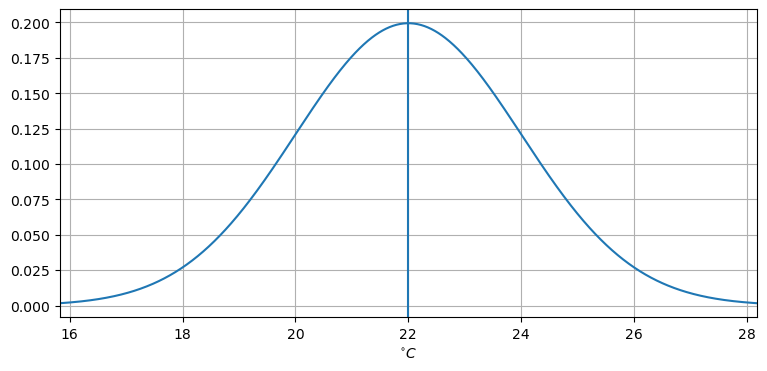

In [27]:
plot_gaussian_pdf(22, 4, mean_line=True, xlabel='$^{\circ}C$');

What does this curve *mean*? Assume we have a thermometer which reads 22°C. No thermometer is perfectly accurate, and so we expect that each reading will be slightly off the actual value. However, a theorem called  [*Central Limit Theorem*](https://en.wikipedia.org/wiki/Central_limit_theorem) states that if we make many measurements that the measurements will be normally distributed. When we look at this chart we can see it is proportional to the probability of the thermometer reading a particular value given the actual temperature of 22°C. 

Recall that a Gaussian distribution is *continuous*. Think of an infinitely long straight line - what is the probability that a point you pick randomly is at 2. Clearly 0%, as there is an infinite number of choices to choose from. The same is true for normal distributions; in the graph above the probability of being *exactly* 2°C is 0% because there are an infinite number of values the reading can take.

What is this curve? It is something we call the *probability density function.* The area under the curve at any region gives you the probability of those values. So, for example, if you compute the area under the curve between 20 and 22 the resulting area will be the probability of the temperature reading being between those two temperatures. 

Here is another way to understand it. What is the *density* of a rock, or a sponge? It is a measure of how much mass is compacted into a given space. Rocks are dense, sponges less so. So, if you wanted to know how much a rock weighed but didn't have a scale, you could take its volume and multiply by its density. This would give you its mass. In practice density varies in most objects, so you would integrate the local density across the rock's volume.

$$M = \iiint_R p(x,y,z)\, dV$$

We do the same with *probability density*. If you want to know the temperature being between 20°C and 21°C you would integrate the curve above from 20 to 21. As you know the integral of a curve gives you the area under the curve. Since this is a curve of the probability density, the integral of the density is the probability. 

What is the probability of the temperature being exactly 22°C? Intuitively, 0. These are real numbers, and the odds of 22°C vs, say, 22.00000000000017°C is infinitesimal. Mathematically, what would we get if we integrate from 22 to 22? Zero. 

Thinking back to the rock, what is the weight of an single point on the rock? An infinitesimal point must have no weight. It makes no sense to ask the weight of a single point, and it makes no sense to ask about the probability of a continuous distribution having a single value. The answer for both is obviously zero.

In practice our sensors do not have infinite precision, so a reading of 22°C implies a range, such as 22 $\pm$ 0.1°C, and we can compute the probability of that range by integrating from 21.9 to 22.1.

We can think of this in Bayesian terms or frequentist terms. As a Bayesian, if the thermometer reads exactly 22°C, then our belief is described by the curve - our belief that the actual (system) temperature is near 22°C is very high, and our belief that the actual temperature is near 18 is very low. As a frequentist we would say that if we took 1 billion temperature measurements of a system at exactly 22°C, then a histogram of the measurements would look like this curve. 

How do you compute the probability, or area under the curve? You integrate the equation for the Gaussian 

$$ \int^{x_1}_{x_0}  \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{1}{2}{(x-\mu)^2}/\sigma^2 } dx$$

This is called the *cumulative probability distribution*, commonly abbreviated *cdf*.

I wrote `filterpy.stats.norm_cdf` which computes the integral for you. For example, we can compute

这条曲线*是什么意思*？假设我们有一个读数为 22°C 的温度计。没有温度计是完全准确的，因此我们预计每个读数都会略微偏离实际值。然而，一个名为 [*Central Limit Theorem（中心极限定理）*](https://en.wikipedia.org/wiki/Central_limit_theorem) 的定理指出，如果我们进行多次测量，则测量结果将服从正态分布。当我们查看此图表时，我们可以看到它与给定 22°C 的实际温度时温度计读取特定值的概率成正比。

回想一下，高斯分布是*连续*的。想一想一条无限长的直线——您随机选择的点为 2 的概率是多少。显然是 0%，因为有无限多的选择可供选择。正态分布也是如此；在上图中，*精确* 2°C 的概率为 0%，因为读数可以取无限多个值。

这条曲线是什么？我们称之为*概率密度函数。*任何区域的曲线下面积都会为您提供这些值的概率。因此，例如，如果您计算 20 和 22 之间的曲线下面积，则所得面积将是温度读数介于这两个温度之间的概率。

这是另一种理解它的方法。岩石或海绵的*密度*是多少？它衡量在给定空间中压缩了多少质量。岩石致密，海绵不那么致密。所以，如果你想知道一块石头的重量但没有秤，你可以用它的体积乘以它的密度。这会给你它的质量。在实践中，大多数物体的密度都不同，因此您可以对岩石体积的局部密度进行积分。

$$M = \iiint_R p(x,y,z)\, dV$$

我们对*概率密度*做同样的事情。如果您想知道 20°C 和 21°C 之间的温度，您可以对上面的曲线从 20 积分到 21。如您所知，曲线的积分给出了曲线下的面积。由于这是概率密度的曲线，因此密度的积分就是概率。

温度恰好为 22°C 的概率是多少？直观地说，0。这些是实数，22°C 与 22.00000000000017°C 的几率是无穷小。从数学上讲，如果我们从 22 积分到 22，我们会得到什么？零。

回想一下岩石，岩石上单点的重量是多少？一个无穷小的点一定没有重量。问单点的权重是没有意义的，问连续分布有单值的概率是没有意义的。两者的答案显然都是零。

实际上，我们的传感器没有无限精度，因此 22°C 的读数意味着一个范围，例如 22 $\pm$ 0.1°C，我们可以通过从 21.9 到 22.1 积分来计算该范围的概率。

我们可以用贝叶斯术语或频率论术语来考虑这一点。作为贝叶斯主义者，如果温度计的读数恰好是 22°C，那么我们的置信度就是用曲线来描述的——我们认为实际（系统）温度接近 22°C 的置信度非常高，而我们相信实际温度接近 18°C很低。作为频率论者，我们会说，如果我们在恰好 22°C 下对系统进行 10 亿次温度测量，那么测量值的直方图将类似于这条曲线。

您如何计算概率或曲线下面积？您对高斯方程进行积分

$$ \int^{x_1}_{x_0} \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{1}{2}{(x-\mu)^2} /\sigma^2 } dx$$

这称为*累积概率分布*，通常缩写为*cdf*。

我写了 `filterpy.stats.norm_cdf` 来为你计算积分。例如，我们可以计算

In [28]:
from filterpy.stats import norm_cdf
print('Cumulative probability of range 21.5 to 22.5 is {:.2f}%'.format(
      norm_cdf((21.5, 22.5), 22,4)*100))
print('Cumulative probability of range 23.5 to 24.5 is {:.2f}%'.format(
      norm_cdf((23.5, 24.5), 22,4)*100))

Cumulative probability of range 21.5 to 22.5 is 19.74%
Cumulative probability of range 23.5 to 24.5 is 12.10%


The mean ($\mu$) is what it sounds like — the average of all possible probabilities. Because of the symmetric shape of the curve it is also the tallest part of the curve. The thermometer reads 22°C, so that is what we used for the mean.  

The notation for a normal distribution for a random variable $X$ is $X \sim\ \mathcal{N}(\mu,\sigma^2)$ where $\sim$ means *distributed according to*. This means I can express the temperature reading of our thermometer as

$$\text{temp} \sim \mathcal{N}(22,4)$$

This is an extremely important result. Gaussians allow me to capture an infinite number of possible values with only two numbers! With the values $\mu=22$ and $\sigma^2=4$ I can compute the distribution of measurements over any range.

Some sources use $\mathcal N (\mu, \sigma)$ instead of $\mathcal N (\mu, \sigma^2)$. Either is fine, they are both conventions. You need to keep in mind which form is being used if you see a term such as $\mathcal{N}(22,4)$. In this book I always use $\mathcal N (\mu, \sigma^2)$, so $\sigma=2$, $\sigma^2=4$ for this example.

平均值（$\mu$）就是它听起来的样子——所有可能概率的平均值。由于曲线的对称形状，它也是曲线的最高部分。温度计读数为 22°C，这就是我们使用的平均值。随机变量 $X$ 的正态分布符号是 $X \sim\ \mathcal{N}(\mu,\sigma^2)$ 其中 $\sim$ 表示*分布根据*。这意味着我可以将温度计的温度读数表示为 $$\text{temp} \sim \mathcal{N}(22,4)$$ 这是一个极其重要的结果。高斯让我只用两个数字就可以捕捉到无限多的可能值！使用值 $\mu=22$ 和 $\sigma^2=4$ 我可以计算任何范围内的测量值分布。

一些来源使用 $\mathcal N (\mu, \sigma)$ 而不是 $\mathcal N (\mu, \sigma^2)$。两者都可以，它们都是约定俗成的。如果您看到诸如 $\mathcal{N}(22,4)$ 之类的项，您需要记住正在使用哪种形式。在这本书中我总是使用 $\mathcal N (\mu, \sigma^2)$，所以对于这个例子来说 $\sigma=2$, $\sigma^2=4$。

## The Variance and Belief

Since this is a probability density distribution it is required that the area under the curve always equals one. This should be intuitively clear — the area under the curve represents all possible outcomes, *something* happened, and the probability of *something happening* is one, so the density must sum to one. We can prove this ourselves with a bit of code. (If you are mathematically inclined, integrate the Gaussian equation from $-\infty$ to $\infty$)

## 方差和置信度

 由于这是概率密度分布，因此要求曲线下的面积始终等于 1。这在直觉上应该很清楚——曲线下的面积代表所有可能的结果，*某事*发生了，*某事发生*的概率是一，所以密度之和必须为一。我们可以用一些代码自己证明这一点。 （如果你有数学倾向，将高斯方程从 $-\infty$ 积分到 $\infty$）

In [29]:
print(norm_cdf((-1e8, 1e8), mu=0, var=4))

1.0


This leads to an important insight. If the variance is small the curve will be narrow. this is because the variance is a measure of *how much* the samples vary from the mean. To keep the area equal to 1, the curve must also be tall. On the other hand if the variance is large the curve will be wide, and thus it will also have to be short to make the area equal to 1.

Let's look at that graphically. We will use the aforementioned `filterpy.stats.gaussian` which can take either a single value or array of values.

这导致了一个重要的见解。如果方差很小，曲线就会很窄。这是因为方差是衡量样本与平均值的*多少*的量度。要保持面积等于 1，曲线也必须很高。另一方面，如果方差很大，曲线就会很宽，因此也必须很短才能使面积等于 1。

让我们以图形方式看一下。我们将使用前面提到的“filterpy.stats.gaussian”，它可以采用单个值或值数组。

In [30]:
from filterpy.stats import gaussian

print(gaussian(x=3.0, mean=2.0, var=1))
print(gaussian(x=[3.0, 2.0], mean=2.0, var=1))

0.24197072451914337
[0.378 0.622]


By default `gaussian` normalizes the output, which turns the output back into a probability distribution. Use the argument`normed` to control this.

默认情况下，“gaussian”对输出进行归一化，从而将输出变回概率分布。使用参数`normed` 来控制它。

In [31]:
print(gaussian(x=[3.0, 2.0], mean=2.0, var=1, normed=False))

[0.242 0.399]


If the Gaussian is not normalized it is called a *Gaussian function* instead of *Gaussian distribution*.  

如果高斯未归一化，则称为*高斯函数*而不是*高斯分布*。

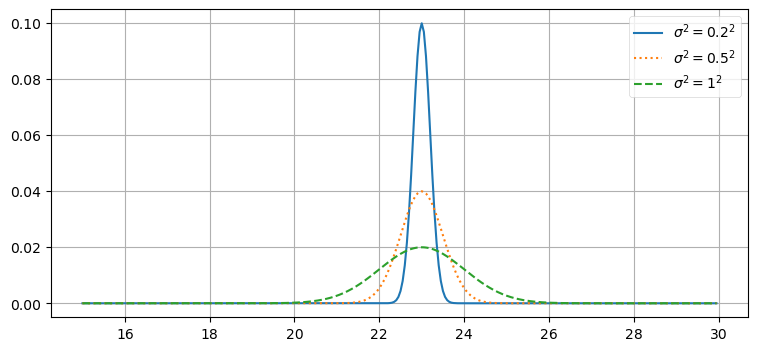

In [32]:
xs = np.arange(15, 30, 0.05)
plt.plot(xs, gaussian(xs, 23, 0.2**2), label='$\sigma^2=0.2^2$')
plt.plot(xs, gaussian(xs, 23, .5**2), label='$\sigma^2=0.5^2$', ls=':')
plt.plot(xs, gaussian(xs, 23, 1**2), label='$\sigma^2=1^2$', ls='--')
plt.legend();

What is this telling us? The Gaussian with $\sigma^2=0.2^2$ is very narrow. It is saying that we believe $x=23$, and that we are very sure about that: within $\pm 0.2$ std. In contrast, the Gaussian with $\sigma^2=1^2$ also believes that $x=23$, but we are much less sure about that. Our belief that $x=23$ is lower, and so our belief about the likely possible values for $x$ is spread out — we think it is quite likely that $x=20$ or $x=26$, for example. $\sigma^2=0.2^2$ has almost completely eliminated $22$ or $24$ as possible values, whereas $\sigma^2=1^2$ considers them nearly as likely as $23$.

If we think back to the thermometer, we can consider these three curves as representing the readings from three different thermometers. The curve for $\sigma^2=0.2^2$ represents a very accurate thermometer, and curve for $\sigma^2=1^2$ represents a fairly inaccurate one. Note the very powerful property the Gaussian distribution affords us — we can entirely represent both the reading and the error of a thermometer with only two numbers — the mean and the variance.

An equivalent formation for a Gaussian is $\mathcal{N}(\mu,1/\tau)$ where $\mu$ is the *mean* and $\tau$ the *precision*. $1/\tau = \sigma^2$; it is the reciprocal of the variance. While we do not use this formulation in this book, it underscores that the variance is a measure of how precise our data is. A small variance yields large precision — our measurement is very precise. Conversely, a large variance yields low precision — our belief is spread out across a large area. You should become comfortable with thinking about Gaussians in these equivalent forms. In Bayesian terms Gaussians reflect our *belief* about a measurement, they express the *precision* of the measurement, and they express how much *variance* there is in the measurements. These are all different ways of stating the same fact.

I'm getting ahead of myself, but in the next chapters we will use Gaussians to express our belief in things like the estimated position of the object we are tracking, or the accuracy of the sensors we are using.

这告诉我们什么？ $\sigma^2=0.2^2$ 的高斯分布非常窄。它是说我们相信 $x=23$，并且我们对此非常确定：在 $\pm 0.2$ std 之内。相比之下，$\sigma^2=1^2$ 的高斯也相信 $x=23$，但我们对此不太确定。我们认为 $x=23$ 较低，因此我们对 $x$ 的可能值的看法被分散了——例如，我们认为很可能 $x=20$ 或 $x=26$。 $\sigma^2=0.2^2$ 几乎完全排除了 $22$ 或 $24$ 作为可能值，而 $\sigma^2=1^2$ 认为它们几乎与 $23$ 一样可能。

如果我们回想一下温度计，我们可以将这三条曲线视为代表三个不同温度计的读数。 $\sigma^2=0.2^2$ 的曲线代表一个非常准确的温度计，$\sigma^2=1^2$ 的曲线代表一个相当不准确的温度计。请注意高斯分布为我们提供的非常强大的属性——我们可以完全用两个数字——均值和方差来表示温度计的读数和误差。

高斯的等效形式是 $\mathcal{N}(\mu,1/\tau)$，其中 $\mu$ 是*均值*，$\tau$ 是*精度*。 $1/\tau = \sigma^2$；它是方差的倒数。虽然我们在本书中没有使用这个公式，但它强调了方差是衡量数据精确度的指标。小方差产生大精度——我们的测量非常精确。相反，较大的方差会产生较低的精度——我们的置信度分布在一个很大的区域。您应该习惯以这些等价形式思考高斯分布。在贝叶斯术语中，高斯反映了我们对测量的*置信度*，它们表达了测量的*精度*，并且表达了测量中有多少*方差*。这些都是陈述同一事实的不同方式。

我有点超前了，但在接下来的章节中，我们将使用高斯来表达我们对诸如我们正在跟踪的对象的估计位置或我们正在使用的传感器的准确性等事物的置信度。

## The  68-95-99.7 Rule

It is worth spending a few words on standard deviation now. The standard deviation is a measure of how much the data deviates from the mean. For Gaussian distributions, 68% of all the data falls within one standard deviation ($\pm1\sigma$) of the mean, 95% falls within two standard deviations ($\pm2\sigma$), and 99.7% within three ($\pm3\sigma$). This is often called the [68-95-99.7 rule](https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule). If you were told that the average test score in a class was 71 with a standard deviation of 9.4, you could conclude that 95% of the students received a score between 52.2 and 89.8 if the distribution is normal (that is calculated with $71 \pm (2 * 9.4)$). 

Finally, these are not arbitrary numbers. If the Gaussian for our position is $\mu=22$ meters, then the standard deviation also has units meters. Thus $\sigma=0.2$ implies that 68% of the measurements range from 21.8 to 22.2 meters. Variance is the standard deviation squared, thus $\sigma^2 = .04$ meters$^2$. As you saw in the last section, writing $\sigma^2 = 0.2^2$ can make this somewhat more meaningful, since the 0.2 is in the same units as the data.

The following graph depicts the relationship between the standard deviation and the normal distribution. 

## 68-95-99.7 规则

现在值得在标准差上多说几句。标准差是衡量数据偏离均值多少的指标。对于高斯分布，68% 的数据落在均值的一个标准差($\pm1\sigma$)以内，95% 落在均值的两个标准差($\pm2\sigma$)以内，99.7% 落在均值的三个标准差($\pm3\sigma$)以内。这通常称为 [68-95-99.7 规则](https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule)。如果你被告知一个班级的平均考试分数是 71，标准差是 9.4，你可以得出结论，95% 的学生的分数在 52.2 到 89.8 之间，如果分布是正态分布（用 $71 \pm (2 * 9.4)$）。

最后，这些不是任意数字。如果我们位置的高斯分布是 $\mu=22$ 米，那么标准差也有单位米。因此 $\sigma=0.2$ 意味着 68% 的测量值范围是 21.8 到 22.2 米。方差是标准偏差的平方，因此 $\sigma^2 = .04$ 米 $^2$。正如您在上一节中看到的那样，编写 $\sigma^2 = 0.2^2$ 可以使这更有意义，因为 0.2 与数据的单位相同。

下图描述了标准偏差与正态分布之间的关系。

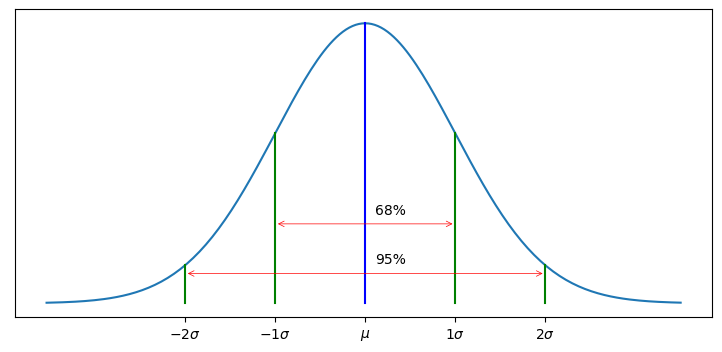

In [33]:
from kf_book.gaussian_internal import display_stddev_plot
display_stddev_plot()

## Interactive Gaussians

For those that are reading this in a Jupyter Notebook, here is an interactive version of the Gaussian plots. Use the sliders to modify $\mu$ and $\sigma^2$. Adjusting $\mu$ will move the graph to the left and right because you are adjusting the mean, and adjusting $\sigma^2$ will make the bell curve thicker and thinner.

## Interactive Gaussians 

对于那些在 Jupyter Notebook 中阅读本文的人，这里是高斯图的交互式版本。使用滑块修改 $\mu$ 和 $\sigma^2$。调整 $\mu$ 会使图形向左和向右移动，因为你在调整均值，而调整 $\sigma^2$ 会使钟形曲线变粗变细。

In [34]:
import math
from ipywidgets import interact, FloatSlider

def plt_g(mu,variance):
    plt.figure()
    xs = np.arange(2, 8, 0.01)
    ys = gaussian(xs, mu, variance)
    plt.plot(xs, ys)
    plt.ylim(0, 0.04)
    plt.show()

interact(plt_g, mu=FloatSlider(value=5, min=3, max=7),
         variance=FloatSlider(value = .03, min=.01, max=1.));

interactive(children=(FloatSlider(value=5.0, description='mu', max=7.0, min=3.0), FloatSlider(value=0.03, desc…

Finally, if you are reading this online, here is an animation of a Gaussian. First, the mean is shifted to the right. Then the mean is centered at $\mu=5$ and the variance is modified.

最后，如果您正在在线阅读这篇文章，这里有一个高斯动画。首先，均值向右移动。然后均值以$\mu=5$为中心，修改方差。

<img src='animations/04_gaussian_animate.gif'>

## Computational Properties of Normally Distributed Random Variables

The discrete Bayes filter works by multiplying and adding arbitrary probability random variables. The Kalman filter uses Gaussians instead of arbitrary random variables, but the rest of the algorithm remains the same. This means we will need to multiply and add Gaussian random variables (Gaussian random variable is just another way to say normally distributed random variable). 

A remarkable property of Gaussian random variables is that the sum of two independent Gaussian random variables is also normally distributed! The product is not Gaussian, but proportional to a Gaussian. There we can say that the result of multipying two Gaussian distributions is a Gaussian function (recall function in this context means that the property that the values sum to one is not guaranteed).

Wikipedia has a good article on this property, and I also prove it at the end of this chapter. 
https://en.wikipedia.org/wiki/Sum_of_normally_distributed_random_variables

Before we do the math, let's test this visually. 

## 正态分布随机变量的计算特性

离散贝叶斯过滤器通过乘以和添加任意概率随机变量来工作。卡尔曼滤波器使用高斯而不是任意随机变量，但算法的其余部分保持不变。这意味着我们需要乘以和添加高斯随机变量（高斯随机变量只是正态分布随机变量的另一种说法）。高斯随机变量的一个显着特性是两个独立的高斯随机变量之和也服从正态分布！乘积不是高斯分布的，而是与高斯分布成正比的。在那里我们可以说两个高斯分布相乘的结果是一个高斯函数（这里的召回函数意味着值和为一的属性是不能保证的）。

维基百科上有一篇关于这个性质的好文章，我也在本章末尾证明了这一点。 https://en.wikipedia.org/wiki/Sum_of_normally_distributed_random_variables

 在我们做数学之前，让我们直观地测试一下。

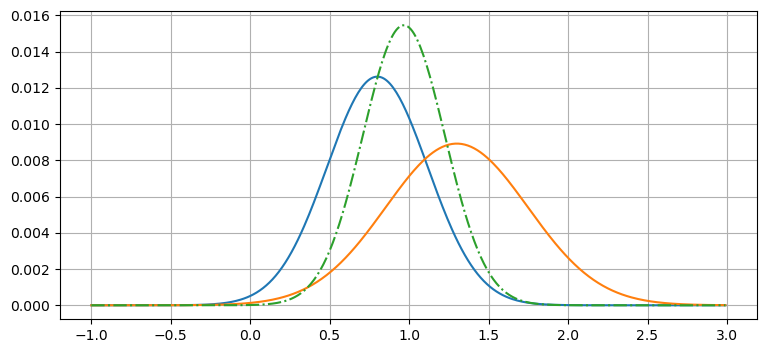

In [35]:
x = np.arange(-1, 3, 0.01)
g1 = gaussian(x, mean=0.8, var=.1)
g2 = gaussian(x, mean=1.3, var=.2)
plt.plot(x, g1, x, g2)

g = g1 * g2  # element-wise multiplication
g = g / sum(g)  # normalize
plt.plot(x, g, ls='-.');

Here I created two Gaussians, g1=$\mathcal N(0.8, 0.1)$ and g2=$\mathcal N(1.3, 0.2)$ and plotted them. Then I multiplied them together and normalized the result. As you can see the result *looks* like a Gaussian distribution.

Gaussians are nonlinear functions. Typically, if you multiply a nonlinear equations you end up with a different type of function. For example, the shape of multiplying two sins is very different from `sin(x)`.

在这里，我创建了两个高斯函数 g1=$\mathcal N(0.8, 0.1)$ 和 g2=$\mathcal N(1.3, 0.2)$ 并绘制了它们。然后我将它们相乘并对结果进行归一化。如您所见，结果*看起来*像高斯分布。

高斯分布是非线性函数。通常，如果将非线性方程相乘，最终会得到不同类型的函数。例如，两个 sin 相乘的形状与 sin(x) 非常不同。

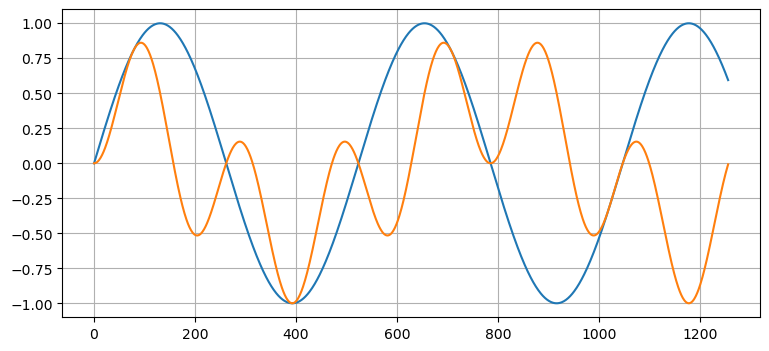

In [36]:
x = np.arange(0, 4*np.pi, 0.01)
plt.plot(np.sin(1.2*x))
plt.plot(np.sin(1.2*x) * np.sin(2*x));

But the result of multiplying two Gaussians distributions is a Gaussian function. This is a key reason why Kalman filters are computationally feasible. Said another way, Kalman filters use Gaussians *because* they are computationally nice. 

The product of two independent Gaussians is given by:

$$\begin{aligned}\mu &=\frac{\sigma_1^2\mu_2 + \sigma_2^2\mu_1}{\sigma_1^2+\sigma_2^2}\\
\sigma^2 &=\frac{\sigma_1^2\sigma_2^2}{\sigma_1^2+\sigma_2^2} 
\end{aligned}$$

The sum of two Gaussian random variables is given by

$$\begin{gathered}\mu = \mu_1 + \mu_2 \\
\sigma^2 = \sigma^2_1 + \sigma^2_2
\end{gathered}$$

At the end of the chapter I derive these equations. However, understanding the deriviation is not very important.

但是两个高斯分布相乘的结果是一个高斯函数。这是卡尔曼滤波器在计算上可行的关键原因。换句话说，卡尔曼滤波器使用高斯 *因为*它们在计算上很好。

两个独立高斯分布的乘积为： $$\begin{aligned}\mu &=\frac{\sigma_1^2\mu_2 + \sigma_2^2\mu_1}{\sigma_1^2+\sigma_2^2}\ \ \sigma^2 &=\frac{\sigma_1^2\sigma_2^2}{\sigma_1^2+\sigma_2^2} \end{aligned}$$ 

两个高斯随机变量之和由 

$$\begin{gathered}\mu = \mu_1 + \mu_2 \\
\sigma^2 = \sigma^2_1 + \sigma^2_2
\end{gathered}$$

 在本章的末尾，我推导出了这些等式。然而，理解推导并不是很重要。

## Putting it all Together

Now we are ready to talk about how Gaussians can be used in filtering. In the next chapter we will implement a filter using Gaussins. Here I will explain why we would want to use Gaussians.

In the previous chapter we represented probability distributions with an array. We performed the update computation by computing the element-wise product of that distribution with another distribution representing the likelihood of the measurement at each point, like so:

## 总结

我们准备讨论如何在过滤中使用高斯分布。在下一章中，我们将使用高斯函数实现一个滤波器。在这里我将解释为什么我们要使用高斯。
在上一章中，我们用数组表示概率分布。我们通过计算该分布与代表每个点测量可能性的另一个分布的逐元素乘积来执行更新计算，如下所示：

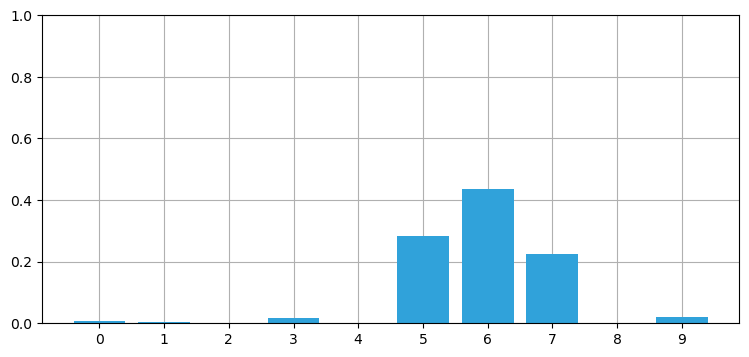

In [37]:
def normalize(p):
    return p / sum(p)

def update(likelihood, prior):
    return normalize(likelihood * prior)

prior =      normalize(np.array([4, 2, 0, 7, 2, 12, 35, 20, 3, 2]))
likelihood = normalize(np.array([3, 4, 1, 4, 2, 38, 20, 18, 1, 16]))
posterior = update(likelihood, prior)
book_plots.bar_plot(posterior)

In other words, we have to compute 10 multiplications to get this result. For a real filter with large arrays in multiple dimensions we'd require billions of multiplications, and vast amounts of memory. 

But this distribution looks like a Gaussian. What if we use a Gaussian instead of an array? I'll compute the mean and variance of the posterior and plot it against the bar chart.

换句话说，我们必须计算 10 次乘法才能得到这个结果。对于具有多个维度的大型数组的真实过滤器，我们需要数十亿次乘法和大量内存。

但是这个分布看起来像高斯分布。如果我们使用高斯而不是数组会怎么样？我将计算后验的均值和方差并将其绘制在条形图上。

mean: 5.88 var: 1.24


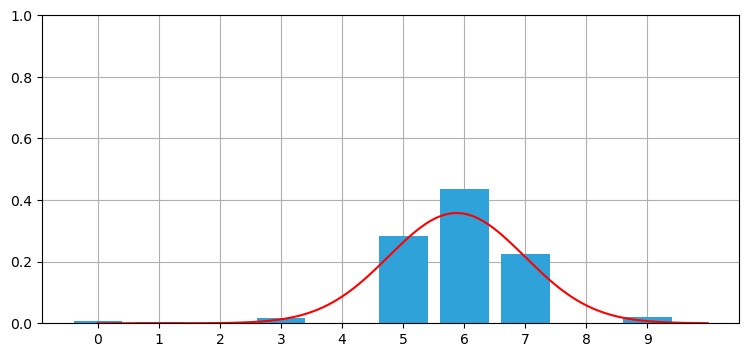

In [38]:
xs = np.arange(0, 10, .01)

def mean_var(p):
    x = np.arange(len(p))
    mean = np.sum(p * x,dtype=float)
    var = np.sum((x - mean)**2 * p)
    return mean, var

mean, var = mean_var(posterior)
book_plots.bar_plot(posterior)
plt.plot(xs, gaussian(xs, mean, var, normed=False), c='r');
print('mean: %.2f' % mean, 'var: %.2f' % var)

This is impressive. We can describe an entire distribution of numbers with only two numbers. Perhaps this example is not persuasive, given there are only 10 numbers in the distribution. But a real problem could have millions of numbers, yet still only require two numbers to describe it.

Next, recall that our filter implements the update function with
```python
def update(likelihood, prior):
    return normalize(likelihood * prior)
```

If the arrays contain a million elements, that is one million multiplications. However, if we replace the arrays with a Gaussian then we would perform that calculation with

$$\begin{aligned}\mu &=\frac{\sigma_1^2\mu_2 + \sigma_2^2\mu_1}{\sigma_1^2+\sigma_2^2}\\
\sigma^2 &=\frac{\sigma_1^2\sigma_2^2}{\sigma_1^2+\sigma_2^2} 
\end{aligned}$$

which is three multiplications and two divisions.

这令人印象深刻。我们可以仅用两个数字来描述整个数字分布。也许这个例子没有说服力，因为分布中只有 10 个数字。但一个真正的问题可能有数百万个数字，但仍然只需要两个数字来描述它。

接下来，回想一下我们的过滤器使用

```python
def update(likelihood, prior):
     return normalize(likelihood * prior) 
```

如果数组包含一百万个元素，那就是一百万次乘法。

但是，如果我们用高斯替换数组，那么我们将使用 $$\begin{aligned}\mu &=\frac{\sigma_1^2\mu_2 + \sigma_2^2\mu_1}{\sigma_1^2+\sigma_2^2}\\ \sigma^2 &=\frac{\sigma_1^2\sigma_2^2}{\sigma_1^2+\sigma_2^2} \end{aligned}$$  执行该计算

这是三个乘法和两个除法。

### Bayes Theorem 贝叶斯定理

In the last chapter we developed an algorithm by reasoning about the information we have at each moment, which we expressed as discrete probability distributions. In the process we discovered [*Bayes' Theorem*](https://en.wikipedia.org/wiki/Bayes%27_theorem). Bayes theorem tells us how to compute the probability of an event given prior information. 



在最后一章中，我们通过对我们在每一时刻所拥有的信息进行推理，开发了一种算法，我们将其表示为离散概率分布。在这个过程中，我们发现了[*Bayes'定理*](https:\/\/en.wikipedia.org\/wiki\/Bayes%27_Theorem)。Bayes定理告诉我们如何计算给定先验信息的事件概率。

We implemented the `update()` function with this probability calculation:
我们用这个概率计算实现了 `update()` 函数：

$$ \mathtt{posterior} = \frac{\mathtt{likelihood}\times \mathtt{prior}}{\mathtt{normalization}}$$ 

It turns out that this is Bayes' theorem. In a second I will develop the mathematics, but in many ways that obscures the simple idea expressed in this equation. We read this as:

原来这就是贝叶斯定理。稍后我将发展数学，但在许多方面模糊了这个等式中表达的简单想法。我们将其解读为：

$$ updated\,knowledge = \big\|likelihood\,of\,new\,knowledge\times prior\, knowledge \big\|$$

where $\| \cdot\|$ expresses normalizing the term.

其中$\| \cdot\|$ 归一化。

We came to this with simple reasoning about a dog walking down a hallway. Yet, as we will see, the same equation applies to a universe of filtering problems. We will use this equation in every subsequent chapter.


To review, the *prior* is the probability of something happening before we include the probability of the measurement (the *likelihood*) and the *posterior* is the probability we compute after incorporating the information from the measurement.

我们通过关于一只狗在走廊上行走的简单推理来得出这个结论。然而，正如我们将看到的，同样的方程式适用于过滤问题的领域。我们将在后续的每一章中使用这个等式。

回顾一下，*先验*是在我们包括测量概率（*可能性*）之前发生某事的概率，*后验*是我们在结合测量信息后计算的概率。

Bayes theorem is
贝叶斯定理是

$$P(A \mid B) = \frac{P(B \mid A)\, P(A)}{P(B)}$$

$P(A \mid B)$ is called a [*conditional probability*](https://en.wikipedia.org/wiki/Conditional_probability). That is, it represents the probability of $A$ happening *if* $B$ happened. For example, it is more likely to rain today compared to a typical day if it also rained yesterday because rain systems usually last more than one day. We'd write the probability of it raining today given that it rained yesterday as $P$(rain today $\mid$ rain yesterday).

$P(A \mid B)$ 称为 [*条件概率*](https://en.wikipedia.org/wiki/Conditional_probability)。也就是说，它表示 *如果* $B$ 发生时 $A$ 发生的概率。例如，如果昨天也下过雨，那么今天下雨的可能性会比通常的一天高，因为雨水系统通常会持续一天以上。鉴于昨天下雨，我们将今天下雨的概率写为 $P$(今天下雨 $\mid$ 昨天下雨)。


I've glossed over an important point. In our code above we are not working with single probabilities, but an array of probabilities - a *probability distribution*. The equation I just gave for Bayes uses probabilities, not probability distributions. However, it is equally valid with probability distributions. We use a lower case $p$ for probability distributions


我已经掩盖了一个重要的观点。在我们上面的代码中，我们不是在处理单一概率，而是处理概率数组——一个*概率分布*。我刚刚给出的贝叶斯方程使用的是概率，而不是概率分布。然而，它同样适用于概率分布。我们使用小写的 $p$ 表示概率分布

$$p(A \mid B) = \frac{p(B \mid A)\, p(A)}{p(B)}$$

In the equation above $B$ is the *evidence*, $p(A)$ is the *prior*, $p(B \mid A)$ is the *likelihood*, and $p(A \mid B)$ is the *posterior*. By substituting the mathematical terms with the corresponding words you can see that Bayes theorem matches our update equation. Let's rewrite the equation in terms of our problem. We will use $x_i$ for the position at *i*, and $z$ for the measurement. Hence, we want to know $P(x_i \mid z)$, that is, the probability of the dog being at $x_i$ given the measurement $z$. 

在上面的等式中，$B$ 是*事实*，$p(A)$ 是*先验*，$p(B \mid A)$ 是*可能性*，$p(A \mid B)$是*后*。通过用相应的词替换数学项，您可以看到贝叶斯定理与我们的更新方程匹配。让我们根据我们的问题重写等式。我们将使用 $x_i$ 作为 *i* 处的位置，使用 $z$ 作为测量值。因此，我们想知道 $P(x_i \mid z)$，即给定测量值 $z$，狗处于 $x_i$ 的概率。

So, let's plug that into the equation and solve it.

$$p(x_i \mid z) = \frac{p(z \mid x_i) p(x_i)}{p(z)}$$

That looks ugly, but it is actually quite simple. Let's figure out what each term on the right means. First is $p(z \mid x_i)$. This is the likelihood, or the probability for the measurement at every cell $x_i$. $p(x_i)$ is the *prior* - our belief before incorporating the measurements. We multiply those together. This is just the unnormalized multiplication in the `update()` function:

所以，让我们把它代入方程式并求解。

$$p(x_i \mid z) = \frac{p(z \mid x_i) p(x_i)}{p(z)}$$

这看起来很难看，但其实很简单。让我们弄清楚右边每个术语的含义。首先是 $p(z \mid x_i)$。这是在每个单元格 $x_i$ 处进行测量的可能性或概率。 $p(x_i)$ 是 *prior* - 我们在合并测量之前的信念。我们将它们相乘。这只是 `update()` 函数中的非标准化乘法：

```python
def update(likelihood, prior):
    posterior = prior * likelihood   # p(z|x) * p(x)
    return normalize(posterior)
```

The last term to consider is the denominator $p(z)$. This is the probability of getting the measurement $z$ without taking the location into account. It is often called the *evidence*. We compute that by taking the sum of $x$, or `sum(belief)` in the code. That is how we compute the normalization! So, the `update()` function is doing nothing more than computing Bayes' theorem.

最后一项要考虑的是分母 $p(z)$。这是在不考虑位置的情况下获得测量值 $z$ 的概率。它通常被称为*证据*。我们通过取 $x$ 的总和或代码中的`sum(belief)`来计算。这就是我们计算归一化的方式！因此，`update()` 函数做的不只是计算贝叶斯定理。

The literature often gives you these equations in the form of integrals. After all, an integral is just a sum over a continuous function. So, you might see Bayes' theorem written as

文献通常以积分的形式为您提供这些方程式。毕竟，积分只是连续函数的总和。所以，你可能会看到贝叶斯定理写成

$$p(A \mid B) = \frac{p(B \mid A)\, p(A)}{\int p(B \mid A_j) p(A_j) \,\, \mathtt{d}A_j}\cdot$$

This denominator is usually impossible to solve analytically; when it can be solved the math is fiendishly difficult. A recent [opinion piece ](http://www.statslife.org.uk/opinion/2405-we-need-to-rethink-how-we-teach-statistics-from-the-ground-up)for the Royal Statistical Society called it a "dog's breakfast" [8].  Filtering textbooks that take a Bayesian approach are filled with integral laden equations with no analytic solution. Do not be cowed by these equations, as we trivially handled this integral by normalizing our posterior. We will learn more techniques to handle this in the **Particle Filters** chapter. Until then, recognize that in practice it is just a normalization term over which we can sum. What I'm trying to say is that when you are faced with a page of integrals, just think of them as sums, and relate them back to this chapter, and often the difficulties will fade. Ask yourself "why are we summing these values", and "why am I dividing by this term". Surprisingly often the answer is readily apparent. Surprisingly often the author neglects to mention this interpretation.

这个分母通常不可能解析求解；当它可以解决时，数学是非常困难的。皇家最近的一篇[观点](http://www.statslife.org.uk/opinion/2405-we-need-to-rethink-how-we-teach-statistics-from-the-ground-up)统计学会称之为“狗的早餐”[8]。采用贝叶斯方法的过滤教科书充满了没有解析解的积分负载方程。不要被这些方程式吓倒，因为我们通过归一化我们的后验来简单地处理这个积分。我们将在 **Particle Filters** 章节中学习更多技术来处理这个问题。在那之前，要认识到在实践中它只是一个我们可以求和的归一化项。我想说的是，当你面对一页积分时，只要把它们想象成总和，并将它们与本章联系起来，通常困难就会消失。问问自己“我们为什么要对这些值求和”，以及“我为什么要除以这个词”。令人惊讶的是，答案往往是显而易见的。令人惊讶的是，作者常常忽略提及这种解释。

It's probable that the strength of Bayes' theorem is not yet fully apparent to you. We want to compute $p(x_i \mid Z)$. That is, at step i, what is our probable state given a measurement. That's an extraordinarily difficult problem in general. Bayes' Theorem is general. We may want to know the probability that we have cancer given the results of a cancer test, or the probability of rain given various sensor readings. Stated like that the problems seem unsolvable.

But Bayes' Theorem lets us compute this by using the inverse  $p(Z\mid x_i)$, which is often straightforward to compute

贝叶斯定理的优势可能对您来说还不是很明显。我们要计算 $p(x_i \mid Z)$。也就是说，在第 i 步，给定测量值我们的可能状态是什么。总的来说，这是一个非常困难的问题。贝叶斯定理是通用的。我们可能想知道根据癌症测试的结果我们患癌症的概率，或者根据各种传感器读数知道下雨的概率。这样说的问题似乎无法解决。

但是贝叶斯定理让我们可以使用逆 $p(Z\mid x_i)$ 来计算它，这通常很容易计算

$$p(x_i \mid Z) \propto p(Z\mid x_i)\, p(x_i)$$

That is, to compute how likely it is to rain given specific sensor readings we only have to compute the likelihood of the sensor readings given that it is raining! That's a ***much*** easier problem! Well, weather prediction is still a difficult problem, but Bayes makes it tractable. 

Likewise, as you saw in the Discrete Bayes chapter, we computed the likelihood that Simon was in any given part of the hallway by computing how likely a sensor reading is given that Simon is at position `x`. A hard problem becomes easy. 

也就是说，要计算给定特定传感器读数下雨的可能性，我们只需计算给定下雨的传感器读数的可能性！这是一个 *** 容易得多***的问题！好吧，天气预报仍然是一个难题，但贝叶斯使其变得易于处理。

同样，正如您在“离散贝叶斯”一章中看到的那样，我们通过计算传感器读数表明西蒙位于位置“x”的可能性有多大来计算西蒙在走廊任何给定部分的可能性。一个困难的问题变得容易。


### Total Probability Theorem

We now know the formal mathematics behind the `update()` function; what about the `predict()` function? `predict()` implements the [*total probability theorem*](https://en.wikipedia.org/wiki/Law_of_total_probability). Let's recall what `predict()` computed. It computed the probability of being at any given position given the probability of all the possible movement events. Let's express that as an equation. The probability of being at any position $i$ at time $t$ can be written as $P(X_i^t)$. We computed that as the sum of the prior at time $t-1$ $P(X_j^{t-1})$ multiplied by the probability of moving from cell $x_j$ to $x_i$. That is

$$P(X_i^t) = \sum_j P(X_j^{t-1})  P(x_i | x_j)$$

That equation is called the *total probability theorem*. Quoting from Wikipedia [6] "It expresses the total probability of an outcome which can be realized via several distinct events". I could have given you that equation and implemented `predict()`, but your chances of understanding why the equation works would be slim. As a reminder, here is the code that computes this equation
### 总概率定理

我们现在知道 `update()` 函数背后的形式数学； `predict()` 函数呢？ `predict()` 实现了[*总概率定理*](https://en.wikipedia.org/wiki/Law_of_total_probability)。让我们回顾一下 `predict()` 的计算结果。在给定所有可能运动事件的概率的情况下，它计算了处于任何给定位置的概率。让我们将其表示为一个方程式。在时间 $t$ 处于任何位置 $i$ 的概率可以写为 $P(X_i^t)$。我们将其计算为时间 $t-1$ 的先验总和 $P(X_j^{t-1})$ 乘以从单元格 $x_j$ 移动到 $x_i$ 的概率。即 $$P(X_i^t) = \sum_j P(X_j^{t-1}) P(x_i | x_j)$$ 

该等式称为*全概率定理*。引用维基百科 [6] “它表达了可以通过几个不同的事件实现的结果的总概率”。我本可以给你那个等式并实现 `predict()`，但是你理解这个等式为什么有效的机会很小。提醒一下，这里是计算这个等式的代码

```python
for i in range(N):
    for k in range (kN):
        index = (i + (width-k) - offset) % N
        result[i] += prob_dist[index] * kernel[k]
```

## Computing Probabilities with scipy.stats

In this chapter I used code from [FilterPy](https://github.com/rlabbe/filterpy) to compute and plot Gaussians. I did that to give you a chance to look at the code and see how these functions are implemented.  However, Python comes with "batteries included" as the saying goes, and it comes with a wide range of statistics functions in the module `scipy.stats`. So let's walk through how to use scipy.stats to compute statistics and probabilities.

The `scipy.stats` module contains a number of objects which you can use to compute attributes of various probability distributions. The full documentation for this module is here: http://docs.scipy.org/doc/scipy/reference/stats.html. We will focus on the  norm variable, which implements the normal distribution. Let's look at some code that uses `scipy.stats.norm` to compute a Gaussian, and compare its value to the value returned by the `gaussian()` function from FilterPy.

## 使用 scipy.stats 计算概率

 在本章中，我使用 [FilterPy](https://github.com/rlabbe/filterpy) 中的代码来计算和绘制高斯图。我这样做是为了让您有机会查看代码并了解这些功能是如何实现的。然而，Python 自带“内含电池”，在 scipy.stats 模块中自带了丰富的统计函数。那么让我们来看看如何使用 scipy.stats 来计算统计数据和概率。
 
`scipy.stats` 模块包含许多对象，您可以使用它们来计算各种概率分布的属性。此模块的完整文档位于：http://docs.scipy.org/doc/scipy/reference/stats.html。我们将重点关注实现正态分布的范数变量。让我们看一些使用 scipy.stats.norm 计算高斯的代码，并将其值与 FilterPy 的 gaussian() 函数返回的值进行比较。

In [39]:
from scipy.stats import norm
import filterpy.stats
print(norm(2, 3).pdf(1.5))
print(filterpy.stats.gaussian(x=1.5, mean=2, var=3*3))

0.13114657203397997
0.13114657203397995


The call `norm(2, 3)` creates what scipy calls a 'frozen' distribution - it creates and returns an object with a mean of 2 and a standard deviation of 3. You can then use this object multiple times to get the probability density of various values, like so:

调用 `norm(2, 3)` 创建了 scipy 所谓的“冻结”分布——它创建并返回一个均值为 2 且标准差为 3 的对象。然后您可以多次使用该对象以获得概率各种值的密度，像这样：

In [40]:
n23 = norm(2, 3)
print('pdf of 1.5 is       %.4f' % n23.pdf(1.5))
print('pdf of 2.5 is also  %.4f' % n23.pdf(2.5))
print('pdf of 2 is         %.4f' % n23.pdf(2))

pdf of 1.5 is       0.1311
pdf of 2.5 is also  0.1311
pdf of 2 is         0.1330


The documentation for  [scipy.stats.norm](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.normfor) [2] lists many other functions. For example, we can generate $n$ samples from the distribution with the `rvs()` function.

In [41]:
np.set_printoptions(precision=3, linewidth=50)
print(n23.rvs(size=15))

[-0.278  4.406  4.136  4.689  3.373  1.14  -1.77
 -1.744  2.774  4.793  2.545  2.714  5.718  1.5
 -0.823]


We can get the [*cumulative distribution function (CDF)*](https://en.wikipedia.org/wiki/Cumulative_distribution_function), which is the probability that a randomly drawn value from the distribution is less than or equal to $x$.

In [42]:
# probability that a random value is less than the mean 2
print(n23.cdf(2))

0.5


We can get various properties of the distribution:

In [43]:
print('variance is', n23.var())
print('standard deviation is', n23.std())
print('mean is', n23.mean())

variance is 9.0
standard deviation is 3.0
mean is 2.0


## Limitations of Using Gaussians to Model the World

Earlier I mentioned the *central limit theorem*, which states that under certain conditions the arithmetic sum of any independent random variable will be normally distributed, regardless of how the random variables are distributed. This is important to us because nature is full of distributions which are not normal, but when we apply the central limit theorem over large populations we end up with normal distributions. 

However, a key part of the proof is “under certain conditions”. These conditions often do not hold for the physical world. For example, a kitchen scale cannot read below zero, but if we represent the measurement error as a Gaussian the left side of the curve extends to negative infinity, implying a very small chance of giving a negative reading. 

This is a broad topic which I will not treat exhaustively. 

Let's consider a trivial example. We think of things like test scores as being normally distributed. If you have ever had a professor “grade on a curve” you have been subject to this assumption. But of course test scores cannot follow a normal distribution. This is because the distribution assigns a nonzero probability distribution for *any* value, no matter how far from the mean. So, for example, say your mean is 90 and the standard deviation is 13. The normal distribution assumes that there is a large chance of somebody getting a 90, and a small chance of somebody getting a 40. However, it also implies that there is a tiny chance of somebody getting a grade of -10, or 150. It assigns an extremely small chance of getting a score of $-10^{300}$ or $10^{32986}$. The tails of a Gaussian distribution are infinitely long.

But for a test we know this is not true. Ignoring extra credit, you cannot get less than 0, or more than 100. Let's plot this range of values using a normal distribution to see how poorly this represents real test scores distributions.

## 使用高斯模型对世界建模的局限性

前面我提到了*中心极限定理*，它指出在特定条件下，任何独立随机变量的算术和都将服从正态分布，而不管随机变量是如何分布的。这对我们很重要，因为自然界充满了非正态分布，但当我们将中心极限定理应用于大量人口时，我们最终会得到正态分布。

然而，证明的一个关键部分是“在特定条件下”。这些条件通常不适用于物理世界。例如，厨房秤的读数不能低于零，但如果我们将测量误差表示为高斯分布，则曲线的左侧会延伸到负无穷大，这意味着给出负读数的可能性非常小。

这是一个广泛的话题，我不会详尽地讨论。

让我们考虑一个简单的例子。我们认为诸如考试成绩之类的东西是正态分布的。如果你曾经有过一位教授“曲线上的成绩”，你就会受到这种假设的影响。但是当然考试成绩不能服从正态分布。这是因为该分布为 *any* 值分配了非零概率分布，无论与均值相差多远。因此，例如，假设您的均值为 90，标准差为 13。正态分布假定某人获得 90 的可能性很大，而某人获得 40 的可能性很小。然而，这也意味着有某人获得 -10 或 150 分的可能性极小。它指定获得 $-10^{300}$ 或 $10^{32986}$ 分数的可能性极小。高斯分布的尾部无限长。

但是对于测试，我们知道这不是真的。忽略额外的分数，你不能得到小于 0 或大于 100 的分数。让我们使用正态分布绘制这个范围的值，看看它代表真实测试分数分布的程度。

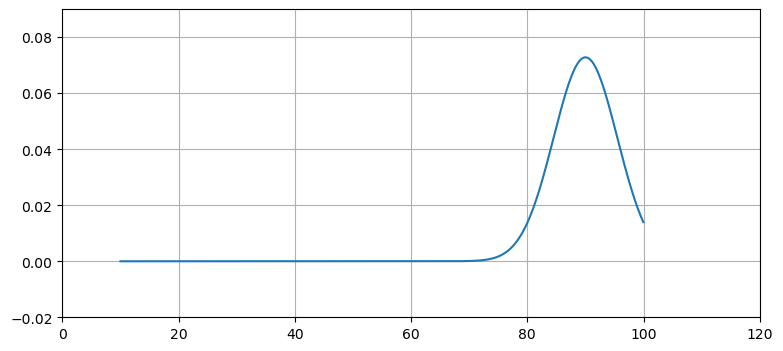

In [44]:
xs = np.arange(10, 100, 0.05)
ys = [gaussian(x, 90, 30) for x in xs]
plt.plot(xs, ys, label='var=0.2')
plt.xlim(0, 120)
plt.ylim(-0.02, 0.09);

The area under the curve cannot equal 1, so it is not a probability distribution. What actually happens is that more students than predicted by a normal distribution get scores nearer the upper end of the range (for example), and that tail becomes “fat”. Also, the test is probably not able to perfectly distinguish minute differences in skill in the students, so the distribution to the left of the mean is also probably a bit bunched up in places. 

Sensors measure the world. The errors in a sensor's measurements are rarely truly Gaussian. It is far too early to be talking about the difficulties that this presents to the Kalman filter designer. It is worth keeping in the back of your mind the fact that the Kalman filter math is based on an idealized model of the world.  For now I will present a bit of code that I will be using later in the book to form distributions to simulate various processes and sensors. This distribution is called the [*Student's $t$-distribution*](https://en.wikipedia.org/wiki/Student%27s_t-distribution). 

Let's say I want to model a sensor that has some white noise in the output. For simplicity, let's say the signal is a constant 10, and the standard deviation of the noise is 2. We can use the function `numpy.random.randn()` to get a random number with a mean of 0 and a standard deviation of 1. I can simulate this with:

曲线下面积不能等于1，所以不是概率分布。实际发生的情况是，比正态分布预测的更多学生获得更接近范围上限的分数（例如），并且尾巴变得“胖”。此外，测试可能无法完美地区分学生技能上的微小差异，因此均值左侧的分布也可能在某些地方有点聚集。

传感器可以测量世界。传感器测量中的误差很少是真正的高斯误差。现在谈论这给卡尔曼滤波器设计者带来的困难还为时过早。卡尔曼滤波器数学是基于理想化的世界模型这一事实值得牢记在心。现在我将提供一些代码，我将在本书后面使用这些代码来形成分布以模拟各种过程和传感器。此分布称为 [*Student's $t$-distribution*](https://en.wikipedia.org/wiki/Student%27s_t-distribution)。

假设我想为输出中有一些白噪声的传感器建模。为简单起见，假设信号为常数 10，噪声的标准差为 2。我们可以使用函数 `numpy.random.randn()` 获得均值为 0 且标准差为 0 的随机数的 1. 我可以模拟这个：

In [45]:
from numpy.random import randn
def sense():
    return 10 + randn()*2

Let's plot that signal and see what it looks like.

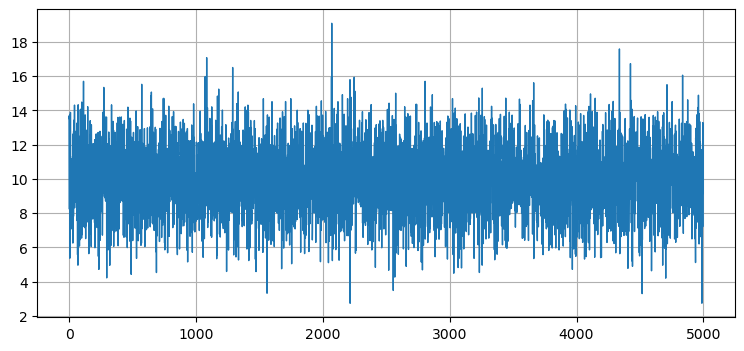

In [46]:
zs = [sense() for i in range(5000)]
plt.plot(zs, lw=1);

That looks like what I would expect. The signal is centered around 10. A standard deviation of 2 means that 68% of the measurements will be within $\pm$ 2 of 10, and 99% will be within $\pm$ 6 of 10, and that looks like what is happening. 

Now let's look at distribution generated with the Student's $t$-distribution. I will not go into the math, but just give you the source code for it and then plot a distribution using it.

这看起来像我所期望的。信号以 10 为中心。标准偏差为 2 意味着 68% 的测量值将在 $\pm$ 2 of 10 内，99% 将在 $\pm$ 6 of 10 内，这看起来像发生。现在让我们看看学生的 $t$ 分布生成的分布。我不会深入研究数学，只是给你它的源代码，然后使用它绘制分布图。

In [47]:
import random
import math

def rand_student_t(df, mu=0, std=1):
    """return random number distributed by Student's t 
    distribution with `df` degrees of freedom with the 
    specified mean and standard deviation.
    """
    x = random.gauss(0, std)
    y = 2.0*random.gammavariate(0.5*df, 2.0)
    return x / (math.sqrt(y / df)) + mu

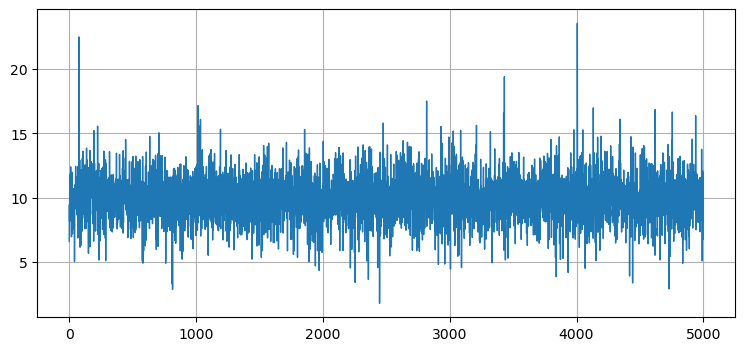

In [48]:
def sense_t():
    return 10 + rand_student_t(7)*2

zs = [sense_t() for i in range(5000)]
plt.plot(zs, lw=1);

We can see from the plot that while the output is similar to the normal distribution there are outliers that go far more than 3 standard deviations from the mean (7 to 13). 

It is unlikely that the Student's $t$-distribution is an accurate model of how your sensor (say, a GPS or Doppler) performs, and this is not a book on how to model physical systems. However, it does produce reasonable data to test your filter's performance when presented with real world noise. We will be using distributions like these throughout the rest of the book in our simulations and tests. 

This is not an idle concern. The Kalman filter equations assume the noise is normally distributed, and perform sub-optimally if this is not true. Designers for mission critical filters, such as the filters on spacecraft, need to master a lot of theory and empirical knowledge about the performance of the sensors on their spacecraft. For example, a presentation I saw on a NASA mission stated that while theory states that they should use 3 standard deviations to distinguish noise from valid measurements in practice they had to use 5 to 6 standard deviations. This was something they determined by experiments.

The code for rand_student_t is included in `filterpy.stats`. You may use it with

```python
from filterpy.stats import rand_student_t
```

While I'll not cover it here, statistics has defined ways of describing the shape of a probability distribution by how it varies from an exponential distribution. The normal distribution is shaped symmetrically around the mean - like a bell curve. However, a probability distribution can be asymmetrical around the mean. The measure of this is called [*skew*](https://en.wikipedia.org/wiki/Skewness). The tails can be shortened, fatter, thinner, or otherwise shaped differently from an exponential distribution. The measure of this is called [*kurtosis*](https://en.wikipedia.org/wiki/Kurtosis). the `scipy.stats` module contains the function `describe` which computes these statistics, among others.

我们可以从图中看出，虽然输出与正态分布相似，但存在离均值（7 到 13）远超过 3 个标准差的离群值。

学生的 $t$ 分布不太可能是您的传感器（例如 GPS 或多普勒）性能的准确模型，而且这不是一本关于如何为物理系统建模的书。但是，它确实会产生合理的数据来测试您的滤波器在出现真实世界噪声时的性能。在本书的其余部分中，我们将在模拟和测试中使用这些分布。

这不是一个无意义的问题。卡尔曼滤波器方程假定噪声服从正态分布，如果不是这样，则执行次优。关键任务滤波器的设计者，例如航天器上的滤波器，需要掌握有关航天器上传感器性能的大量理论和经验知识。例如，我在 NASA 任务中看到的一个演示文稿指出，虽然理论上他们应该使用 3 个标准差来区分噪声和有效测量值，但在实践中他们必须使用 5 到 6 个标准差。这是他们通过实验确定的。

rand_student_t 的代码包含在“filterpy.stats”中。您可以将它与 

```python 
from filterpy.stats import rand_student_t 

``` 

虽然我不会在这里介绍它，但统计学定义了描述概率分布形状的方法，即它与指数分布的差异。正态分布的形状围绕均值对称 - 就像钟形曲线。但是，概率分布可能围绕均值不对称。这种衡量标准称为 [*偏斜*](https://en.wikipedia.org/wiki/Skewness)。尾部可以缩短、变粗、变细或以其他方式与指数分布形成不同的形状。这种测量称为 [*kurtosis*](https://en.wikipedia.org/wiki/Kurtosis)。 `scipy.stats` 模块包含计算这些统计数据的函数 `describe`。

In [49]:
import scipy
scipy.stats.describe(zs)

DescribeResult(nobs=5000, minmax=(1.8063992488016005, 23.538206340364248), mean=9.988346443170425, variance=2.8291785965379304, skewness=0.14571181990966736, kurtosis=2.5726232005034673)

Let's examine two normal populations, one small, one large:

In [50]:
print(scipy.stats.describe(np.random.randn(10)))
print()
print(scipy.stats.describe(np.random.randn(300000)))

DescribeResult(nobs=10, minmax=(-1.497870517026245, 2.451837578585617), mean=0.41222390659455915, variance=1.4544132290730267, skewness=-0.04110392087178835, kurtosis=-0.860798147105704)

DescribeResult(nobs=300000, minmax=(-4.708972275090864, 4.45689320684553), mean=-0.004610017910138928, variance=0.9959572490504001, skewness=0.007809346568706025, kurtosis=0.011534450228849025)


The small sample has very non-zero skew and kurtosis because the small number of samples is not well distributed around the mean of 0. You can see this also by comparing the computed mean and variance with the theoretical mean of 0 and variance 1. In comparison the large sample's mean and variance are very close to the theoretical values, and both the skew and kurtosis are near zero.

小样本具有非常非零的偏斜和峰态，因为少量样本没有很好地分布在均值 0 附近。您还可以通过将计算的均值和方差与理论均值 0 和方差 1 进行比较来看到这一点。在比较大样本的均值和方差非常接近理论值，偏度和峰度都接近于零。

## Product of Gaussians (Optional)

It is not important to read this section. Here I derive the equations for the product of two Gaussians.

You can find this result by multiplying the equation for two Gaussians together and combining terms. The algebra gets messy. I will derive it using Bayes theorem. We can state the problem as: let the prior be $N(\bar\mu, \bar\sigma^2)$, and measurement be $z \propto N(z, \sigma_z^2)$. What is the posterior  x given the measurement z?

Write the posterior as $p(x \mid z)$. Now we can use Bayes Theorem to state

$$p(x \mid z) = \frac{p(z \mid x)p(x)}{p(z)}$$

$p(z)$ is a normalizing constant, so we can create a proportinality

$$p(x \mid z) \propto p(z|x)p(x)$$

Now we subtitute in the equations for the Gaussians, which are

$$p(z \mid x) = \frac{1}{\sqrt{2\pi\sigma_z^2}}\exp \Big[-\frac{(z-x)^2}{2\sigma_z^2}\Big]$$

$$p(x) = \frac{1}{\sqrt{2\pi\bar\sigma^2}}\exp \Big[-\frac{(x-\bar\mu)^2}{2\bar\sigma^2}\Big]$$

We can drop the leading terms, as they are constants, giving us

$$\begin{aligned}
p(x \mid z) &\propto \exp \Big[-\frac{(z-x)^2}{2\sigma_z^2}\Big]\exp \Big[-\frac{(x-\bar\mu)^2}{2\bar\sigma^2}\Big]\\
&\propto \exp \Big[-\frac{(z-x)^2}{2\sigma_z^2}-\frac{(x-\bar\mu)^2}{2\bar\sigma^2}\Big] \\
&\propto \exp \Big[-\frac{1}{2\sigma_z^2\bar\sigma^2}[\bar\sigma^2(z-x)^2+\sigma_z^2(x-\bar\mu)^2]\Big]
\end{aligned}$$

Now we multiply out the squared terms and group in terms of the posterior $x$.

$$\begin{aligned}
p(x \mid z) &\propto \exp \Big[-\frac{1}{2\sigma_z^2\bar\sigma^2}[\bar\sigma^2(z^2 -2xz + x^2) + \sigma_z^2(x^2 - 2x\bar\mu+\bar\mu^2)]\Big ] \\
&\propto \exp \Big[-\frac{1}{2\sigma_z^2\bar\sigma^2}[x^2(\bar\sigma^2+\sigma_z^2)-2x(\sigma_z^2\bar\mu + \bar\sigma^2z) + (\bar\sigma^2z^2+\sigma_z^2\bar\mu^2)]\Big ]
\end{aligned}$$

The last parentheses do not contain the posterior $x$, so it can be treated as a constant and discarded.

$$p(x \mid z) \propto \exp \Big[-\frac{1}{2}\frac{x^2(\bar\sigma^2+\sigma_z^2)-2x(\sigma_z^2\bar\mu + \bar\sigma^2z)}{\sigma_z^2\bar\sigma^2}\Big ]
$$

Divide numerator and denominator by $\bar\sigma^2+\sigma_z^2$ to get

$$p(x \mid z) \propto \exp \Big[-\frac{1}{2}\frac{x^2-2x(\frac{\sigma_z^2\bar\mu + \bar\sigma^2z}{\bar\sigma^2+\sigma_z^2})}{\frac{\sigma_z^2\bar\sigma^2}{\bar\sigma^2+\sigma_z^2}}\Big ]
$$

Proportionality allows us create or delete constants at will, so we can factor this into

$$p(x \mid z) \propto \exp \Big[-\frac{1}{2}\frac{(x-\frac{\sigma_z^2\bar\mu + \bar\sigma^2z}{\bar\sigma^2+\sigma_z^2})^2}{\frac{\sigma_z^2\bar\sigma^2}{\bar\sigma^2+\sigma_z^2}}\Big ]
$$

A Gaussian is

$$N(\mu,\, \sigma^2) \propto \exp\Big [-\frac{1}{2}\frac{(x - \mu)^2}{\sigma^2}\Big ]$$

So we can see that $p(x \mid z)$ has a mean of

$$\mu_\mathtt{posterior} = \frac{\sigma_z^2\bar\mu + \bar\sigma^2z}{\bar\sigma^2+\sigma_z^2}$$

and a variance of
$$
\sigma_\mathtt{posterior} = \frac{\sigma_z^2\bar\sigma^2}{\bar\sigma^2+\sigma_z^2}
$$

I've dropped the constants, and so the result is not a normal, but proportional to one. Bayes theorem normalizes with the $p(z)$ divisor, ensuring that the result is normal. We normalize in the update step of our filters, ensuring the filter estimate is Gaussian.

$$\mathcal N_1 = \| \mathcal N_2\cdot \mathcal N_3\|$$

## Sum of Independent Gaussian Random Variables  (Optional)

Likewise, this section is not important to read. Here I derive the equations for the sum of two independent Gaussian random variables. 

The sum is given by

$$\begin{gathered}\mu = \mu_1 + \mu_2 \\
\sigma^2 = \sigma^2_1 + \sigma^2_2
\end{gathered}$$

There are several proofs for this. I will use convolution since we used convolution in the previous chapter for the histograms of probabilities. 

To find the density function of the sum of two Gaussian random variables we sum the density functions of each. They are nonlinear, continuous functions, so we need to compute the sum with an integral. If the random variables $p$ and $z$ (e.g. prior and measurement) are independent we can compute this with

$p(x) = \int\limits_{-\infty}^\infty f_p(x-z)f_z(z)\, dx$

This is the equation for a convolution. Now we just do some math:


$p(x) = \int\limits_{-\infty}^\infty f_2(x-x_1)f_1(x_1)\, dx$

$=  \int\limits_{-\infty}^\infty 
\frac{1}{\sqrt{2\pi}\sigma_z}\exp\left[-\frac{(x - z - \mu_z)^2}{2\sigma^2_z}\right]
\frac{1}{\sqrt{2\pi}\sigma_p}\exp\left[-\frac{(x - \mu_p)^2}{2\sigma^2_p}\right] \, dx$

$=  \int\limits_{-\infty}^\infty
\frac{1}{\sqrt{2\pi}\sqrt{\sigma_p^2 + \sigma_z^2}} \exp\left[ -\frac{(x - (\mu_p + \mu_z)))^2}{2(\sigma_z^2+\sigma_p^2)}\right]
\frac{1}{\sqrt{2\pi}\frac{\sigma_p\sigma_z}{\sqrt{\sigma_p^2 + \sigma_z^2}}} \exp\left[ -\frac{(x - \frac{\sigma_p^2(x-\mu_z) + \sigma_z^2\mu_p}{}))^2}{2\left(\frac{\sigma_p\sigma_x}{\sqrt{\sigma_z^2+\sigma_p^2}}\right)^2}\right] \, dx$

$= \frac{1}{\sqrt{2\pi}\sqrt{\sigma_p^2 + \sigma_z^2}} \exp\left[ -\frac{(x - (\mu_p + \mu_z)))^2}{2(\sigma_z^2+\sigma_p^2)}\right] \int\limits_{-\infty}^\infty
\frac{1}{\sqrt{2\pi}\frac{\sigma_p\sigma_z}{\sqrt{\sigma_p^2 + \sigma_z^2}}} \exp\left[ -\frac{(x - \frac{\sigma_p^2(x-\mu_z) + \sigma_z^2\mu_p}{}))^2}{2\left(\frac{\sigma_p\sigma_x}{\sqrt{\sigma_z^2+\sigma_p^2}}\right)^2}\right] \, dx$

The expression inside the integral is a normal distribution. The sum of a normal distribution is one, hence the integral is one. This gives us

$$p(x) = \frac{1}{\sqrt{2\pi}\sqrt{\sigma_p^2 + \sigma_z^2}} \exp\left[ -\frac{(x - (\mu_p + \mu_z)))^2}{2(\sigma_z^2+\sigma_p^2)}\right]$$

This is in the form of a normal, where

$$\begin{gathered}\mu_x = \mu_p + \mu_z \\
\sigma_x^2 = \sigma_z^2+\sigma_p^2\, \square\end{gathered}$$

## 独立高斯随机变量的总和（可选）

同样，这部分阅读并不重要。在这里，我推导出两个独立高斯随机变量之和的方程。

总和由
 $$\begin{gathered}\mu = \mu_1 + \mu_2 \\ \sigma^2 = \sigma^2_1 + \sigma^2_2 \end{gathered}$$ 
 给出。
 
 对此有几个证明。我将使用卷积，因为我们在上一章中对概率直方图使用了卷积。为了找到两个高斯随机变量之和的密度函数，我们对每个变量的密度函数求和。它们是非线性的连续函数，所以我们需要用积分来计算和。如果随机变量 $p$ 和 $z$（例如先验和测量）是独立的，我们可以用
 
  $p(x) = \int\limits_{-\infty}^\infty f_p(x-z)f_z(z)\, dx$ 
  
来计算这是一个卷积方程。现在我们只做一些数学运算： 

$p(x) = \int\limits_{-\infty}^\infty f_2(x-x_1)f_1(x_1)\, dx$

$=  \int\limits_{-\infty}^\infty 
\frac{1}{\sqrt{2\pi}\sigma_z}\exp\left[-\frac{(x - z - \mu_z)^2}{2\sigma^2_z}\right]
\frac{1}{\sqrt{2\pi}\sigma_p}\exp\left[-\frac{(x - \mu_p)^2}{2\sigma^2_p}\right] \, dx$

$=  \int\limits_{-\infty}^\infty
\frac{1}{\sqrt{2\pi}\sqrt{\sigma_p^2 + \sigma_z^2}} \exp\left[ -\frac{(x - (\mu_p + \mu_z)))^2}{2(\sigma_z^2+\sigma_p^2)}\right]
\frac{1}{\sqrt{2\pi}\frac{\sigma_p\sigma_z}{\sqrt{\sigma_p^2 + \sigma_z^2}}} \exp\left[ -\frac{(x - \frac{\sigma_p^2(x-\mu_z) + \sigma_z^2\mu_p}{}))^2}{2\left(\frac{\sigma_p\sigma_x}{\sqrt{\sigma_z^2+\sigma_p^2}}\right)^2}\right] \, dx$

$= \frac{1}{\sqrt{2\pi}\sqrt{\sigma_p^2 + \sigma_z^2}} \exp\left[ -\frac{(x - (\mu_p + \mu_z)))^2}{2(\sigma_z^2+\sigma_p^2)}\right] \int\limits_{-\infty}^\infty
\frac{1}{\sqrt{2\pi}\frac{\sigma_p\sigma_z}{\sqrt{\sigma_p^2 + \sigma_z^2}}} \exp\left[ -\frac{(x - \frac{\sigma_p^2(x-\mu_z) + \sigma_z^2\mu_p}{}))^2}{2\left(\frac{\sigma_p\sigma_x}{\sqrt{\sigma_z^2+\sigma_p^2}}\right)^2}\right] \, dx$
 
 里面的表达式积分是正态分布。正态分布的总和为一，因此积分为一。这给了我们
 
  $$p(x) = \frac{1}{\sqrt{2\pi}\sqrt{\sigma_p^2 + \sigma_z^2}} \exp\left[ -\frac{(x - ( \mu_p + \mu_z)))^2}{2(\sigma_z^2+\sigma_p^2)}\right]$$

这是正常的形式，其中
$$\begin{gathered}\mu_x = \mu_p + \mu_z \\
\sigma_x^2 = \sigma_z^2+\sigma_p^2\, \square\end{gathered}$$

## Summary and Key Points

This chapter is a poor introduction to statistics in general. I've only covered the concepts that  needed to use Gaussians in the remainder of the book, no more. What I've covered will not get you very far if you intend to read the Kalman filter literature. If this is a new topic to you I suggest reading a statistics textbook. I've always liked the Schaum series for self study, and Alan Downey's *Think Stats* [5] is also very good and freely available online. 

The following points **must** be understood by you before we continue:

* Normals express a continuous probability distribution
* They are completely described by two parameters: the mean ($\mu$) and variance ($\sigma^2$)
* $\mu$ is the average of all possible values
* The variance $\sigma^2$ represents how much our measurements vary from the mean
* The standard deviation ($\sigma$) is the square root of the variance ($\sigma^2$)
* Many things in nature approximate a normal distribution, but the math is not perfect.
* In filtering problems computing $p(x\mid z)$ is nearly impossible, but computing $p(z\mid x)$ is straightforward. Bayes' lets us compute the former from the latter. 

The next several chapters will be using Gaussians with Bayes' theorem to help perform filtering. As noted in the last section, sometimes Gaussians do not describe the world very well. Latter parts of the book are dedicated to filters which work even when the noise or system's behavior is very non-Gaussian. 

## 总结和要点 

本章总体上是对统计学的糟糕介绍。在本书的其余部分，我只介绍了使用高斯函数所需的概念，不再赘述。如果您打算阅读卡尔曼滤波器文献，我所介绍的内容不会让您走得太远。如果这对您来说是一个新主题，我建议您阅读统计教科书。我一直喜欢自学的 Schaum 系列，Alan Downey 的 *Think Stats* [5] 也非常好，可以免费在线获取。

在我们继续之前，您**必须**理解以下几点： 
* 正态表示连续概率分布
* 它们完全由两个参数描述：均值 ($\mu$) 和方差 ($\sigma^2$)
* $\mu$ 是所有可能值的平均值 
* 方差 $\sigma^2$ 表示我们的测量值与平均值的差异程度 
* 标准差（$\sigma$）是方差的平方根（$\ sigma^2$) 
* 自然界中的许多事物都近似于正态分布，但数学并不完美。
* 在过滤问题中，计算 $p(x\mid z)$ 几乎是不可能的，但计算 $p(z\mid x)$ 很简单。贝叶斯让我们从后者计算前者。

接下来的几章将使用高斯和贝叶斯定理来帮助执行过滤。正如上一节所述，有时高斯分布并不能很好地描述世界。本书的后半部分专门介绍即使在噪声或系统行为非常非高斯时也能正常工作的滤波器。

## References

[1] https://github.com/rlabbe/Kalman-and-Bayesian-Filters-in-Python/blob/master/Supporting_Notebooks/Computing_and_plotting_PDFs.ipynb

[2] http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

[3] http://docs.scipy.org/doc/scipy/reference/tutorial/stats.html

[4] Huber, Peter J. *Robust Statistical Procedures*, Second Edition. Society for Industrial and Applied Mathematics, 1996.

[5] Downey, Alan. *Think Stats*, Second Edition. O'Reilly Media.

https://github.com/AllenDowney/ThinkStats2

http://greenteapress.com/thinkstats/

## Useful Wikipedia Links

https://en.wikipedia.org/wiki/Probability_distribution

https://en.wikipedia.org/wiki/Random_variable

https://en.wikipedia.org/wiki/Sample_space

https://en.wikipedia.org/wiki/Central_tendency

https://en.wikipedia.org/wiki/Expected_value

https://en.wikipedia.org/wiki/Standard_deviation

https://en.wikipedia.org/wiki/Variance

https://en.wikipedia.org/wiki/Probability_density_function

https://en.wikipedia.org/wiki/Central_limit_theorem

https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule

https://en.wikipedia.org/wiki/Cumulative_distribution_function

https://en.wikipedia.org/wiki/Skewness

https://en.wikipedia.org/wiki/Kurtosis